<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/009_superstore_Loss_Discount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loss and Discounts Summary Analysis

#### Key Insights:
1. **Discounts and Losses Relationship**:
   - Loss-making transactions are significantly impacted by high discounts, averaging **51.5%**, compared to just **8.1%** in profitable transactions.
   - **Median discounts** are **60%** for losses, highlighting the detrimental effect of aggressive discounting strategies. The median discount for profitable transactions is 0%.
   - **Maximum discounts** reach **80%** in loss-making transactions, double the 40% cap in profitable ones.

2. **Regional Losses and Discounts**:
   - **Central Region**:
     - The region exhibits the highest discounts (average **59.5%**) and variability, leading to large losses in categories like Appliances and Binders.
     - High cost variability indicates operational inefficiencies.
   - **South Region**:
     - Discounts average **51.8%**, eroding already thin margins. Losses remain moderate but consistent.
     - The smallest market share (**17.1%**) suggests that heavy discounts are not driving significant sales volume.
   - **East Region**:
     - Discounts are also high (**46.8%**), and high operational costs drive losses.
   - **West Region**:
     - Lowest discounts (**38.4%**) among regions, yet inefficiencies in categories like Bookcases and Tables persist.

3. **Category-Level Impact**:
   - **Office Supplies**:
     - Highest discount dependency with **64.36% average discounts**, leading to substantial losses, especially in Appliances and Binders.
   - **Furniture**:
     - Discounts average **30%**, with Tables and Furnishings driving losses.
   - **Technology**:
     - Discounts are lower (**20% median**), with Machines and Phones showing losses but retaining potential due to higher customer demand.

4. **Profitability Trends**:
   - Losses have worsened year over year, with a **15% increase** in mean losses from 2014 to 2017.
   - Discounts have remained stable but excessive, peaking at **80%** in some cases.
   - Costs have risen by **24%** from 2014 to 2017, compounding losses.

---

#### Recommendations for Immediate Action:
1. **Strategic Discounting**:
   - Implement thresholds to cap discounts at 40% for most products and 20% for historically loss-making categories like Appliances, Tables, and Binders.
   - Introduce data-driven discount policies that focus on high-margin products and regions with strong market presence.

2. **Cost Optimization**:
   - Investigate and control rising costs in regions like Central and South, where high discounts amplify losses.
   - Streamline supply chain and inventory management to address inefficiencies in cost-heavy sub-categories.

3. **Category-Specific Interventions**:
   - **Office Supplies**: Reduce deep discounts in Binders and Appliances; focus on increasing margins.
   - **Furniture**: Optimize operations in Furnishings and Tables, which consistently underperform.
   - **Technology**: Leverage customer demand to refine pricing strategies in Phones and Accessories.

4. **Regional Focus**:
   - **Central**: Aggressively reduce discounts and address cost variability to stabilize losses.
   - **South**: Enhance market share through targeted campaigns while reducing reliance on heavy discounts.
   - **East and West**: Optimize cost structures in high-cost sub-categories like Bookcases and Tables.



### Load & Process Data

Dataset loaded successfully.
Removed 4985 duplicate rows.
Column: Sales
Lower Fence: -259.31, Upper Fence: 475.57
Original Dataset: 5009 rows
Non-Outliers: 4399 rows (87.82%)
Outliers: 610 rows (12.18%)


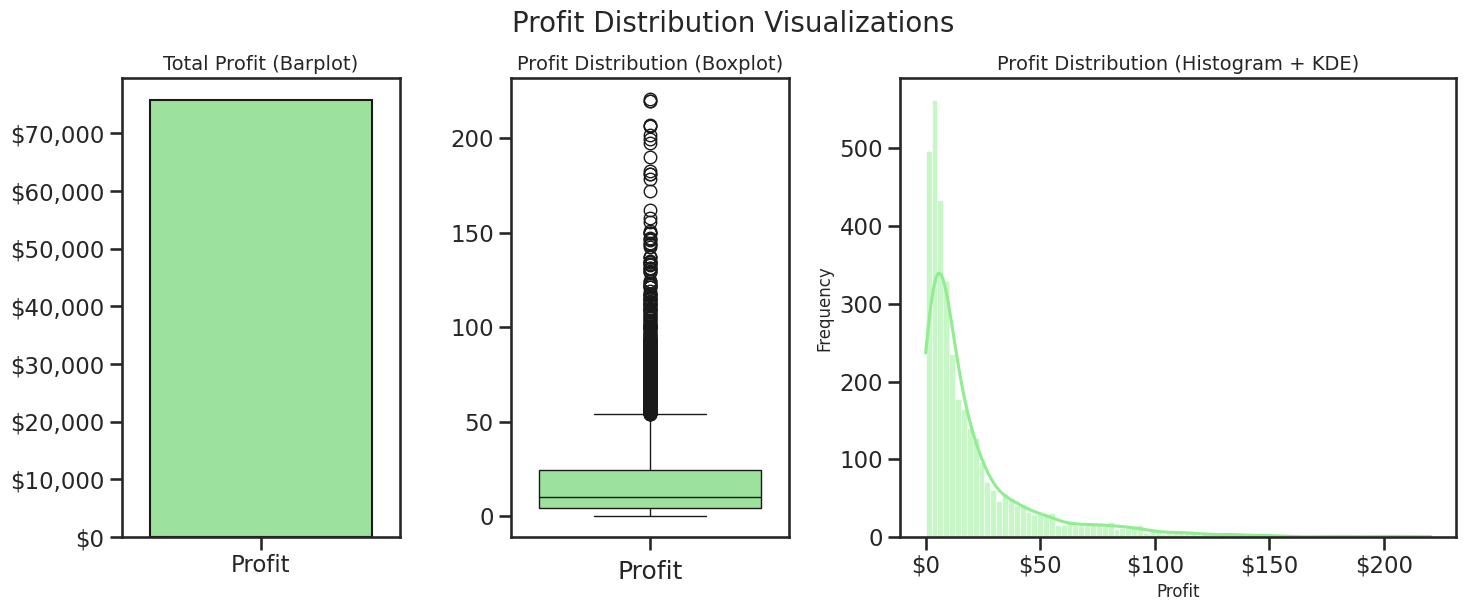

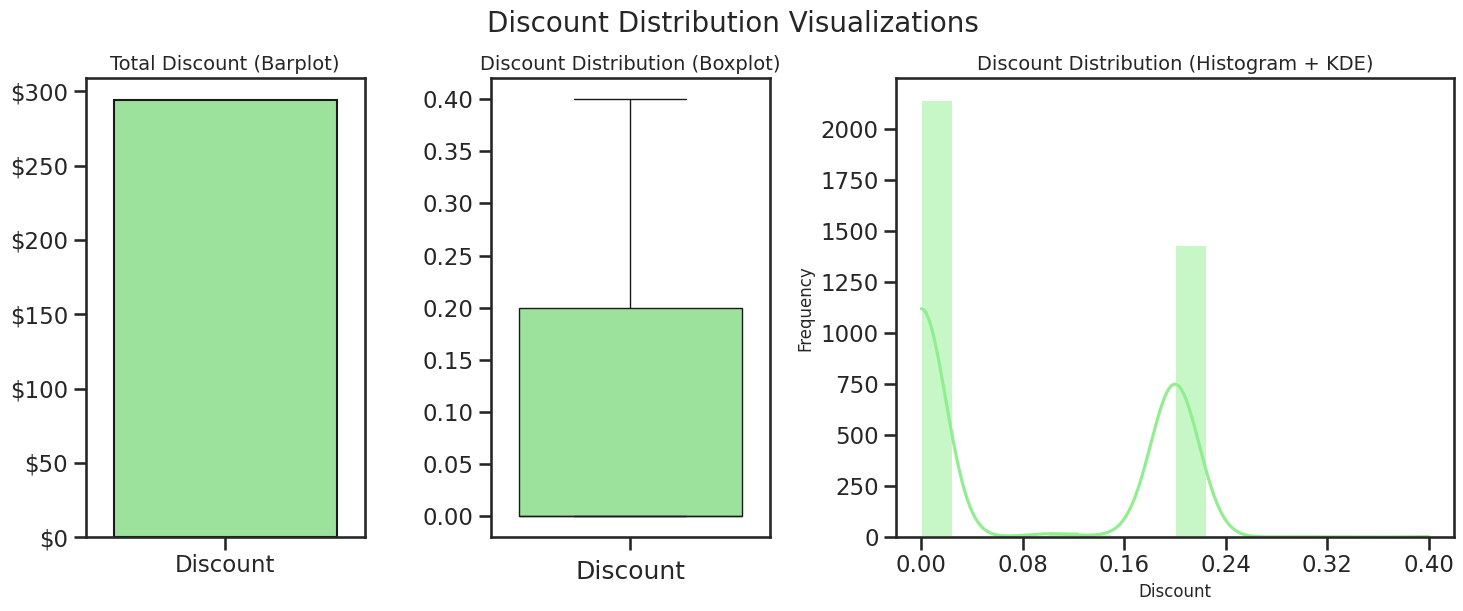

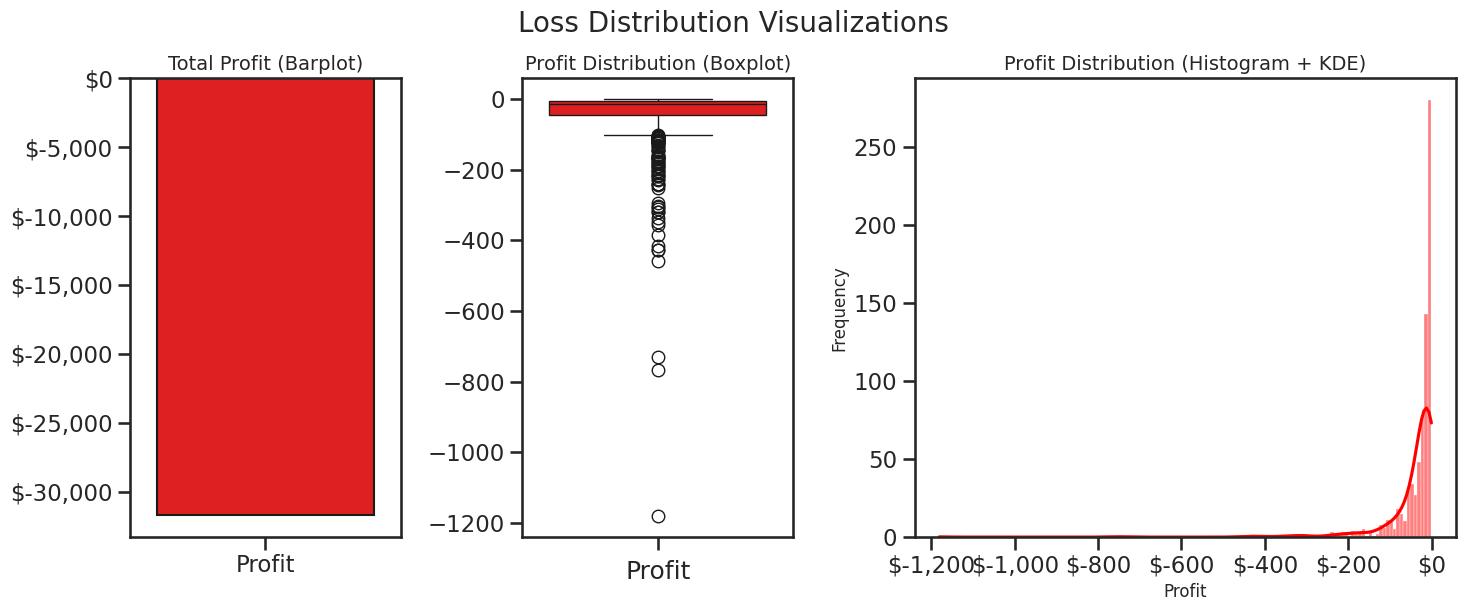

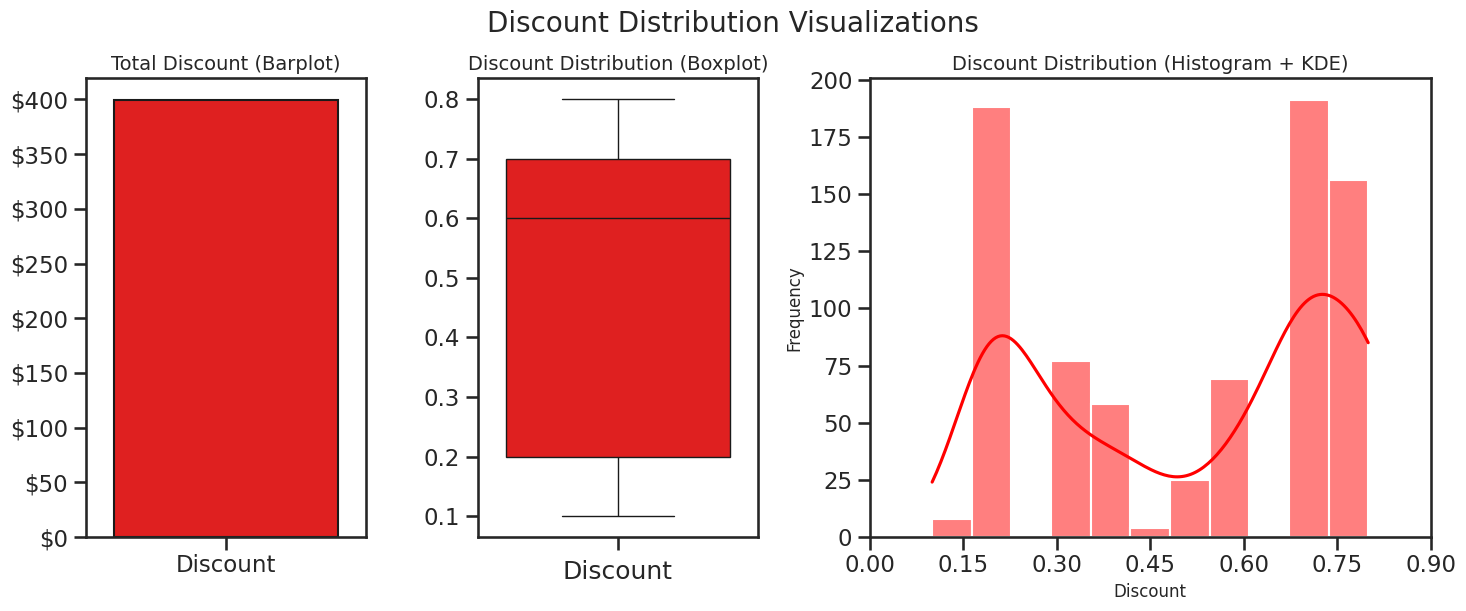

In [4]:
# Import the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu

# Step 1: Load your dataset
try:
    data = pd.read_excel('sample-superstore.xls')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Step 2: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 3: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 4: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Sub-Category', 'Quantity', 'Estimated Cost', 'Average Discount',
                   'Discount', 'Total Quantity', 'Profit Margin', 'Regional Market Share (%)', 'Profit per Category', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 5: Remove duplicates
data = dpu.remove_duplicates(data, subset=['Order ID', 'Customer ID'])

# Step 6: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_categorical_columns(data, columns_to_standardize)

# Step 7: Remove outliers in the 'Sales' column using Tukey's Fences
filtered_data, outliers = dpu.remove_outliers_tukey(data, column='Sales', plot=False)

# Group 1: Data with losses (Profit < 0)
data_losses = filtered_data[filtered_data['Profit'] < 0]
# Group 2: Data with profits (Profit >= 0)
data_profits = filtered_data[filtered_data['Profit'] >= 0]

# plot the profit and discountdata
dvu.plot_sales_distribution(data_profits, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')
dvu.plot_sales_distribution_2(data_profits, column='Discount', title='Discount Distribution Visualizations', color='lightgreen')

# plot the loss and discountdata
dvu.plot_sales_distribution(data_losses , column='Profit', title='Loss Distribution Visualizations', color='red')
dvu.plot_sales_distribution_2(data_losses , column='Discount', title='Discount Distribution Visualizations', color='red')


### Splitting Data into Profits and Losses Rationale

Analyzing profits and losses separately is a strategic approach to uncover the underlying causes of financial performance and inform actionable decisions. Here’s why this methodology makes sense:

1. **Targeted Analysis of Losses:** By isolating data with losses, the analysis can focus specifically on identifying patterns and drivers behind negative profitability, such as high discounts, excessive costs, or inefficient operations, without being diluted by profitable transactions.

2. **Distinct Characteristics:** Profitable and loss-making transactions often have fundamentally different attributes (e.g., discount levels, cost structures). Separating these datasets ensures that trends and anomalies unique to each group are not obscured in aggregated analysis.

3. **Actionable Insights:** Understanding what differentiates loss-making transactions from profitable ones allows for precise interventions, such as adjusting pricing strategies, optimizing cost controls, or targeting high-loss segments.

4. **Visualization and Clarity:** Plotting profits and losses independently makes it easier to visualize their distinct distributions, such as the broader range of costs and higher discount levels in loss-making data, leading to clearer storytelling and better stakeholder communication.

5. **Improved Decision-Making:** This approach ensures that decisions are data-driven and context-specific, helping to minimize losses while reinforcing strategies that maximize profitability.

Figure saved as /content/loss_discount_sumamry_stats.png


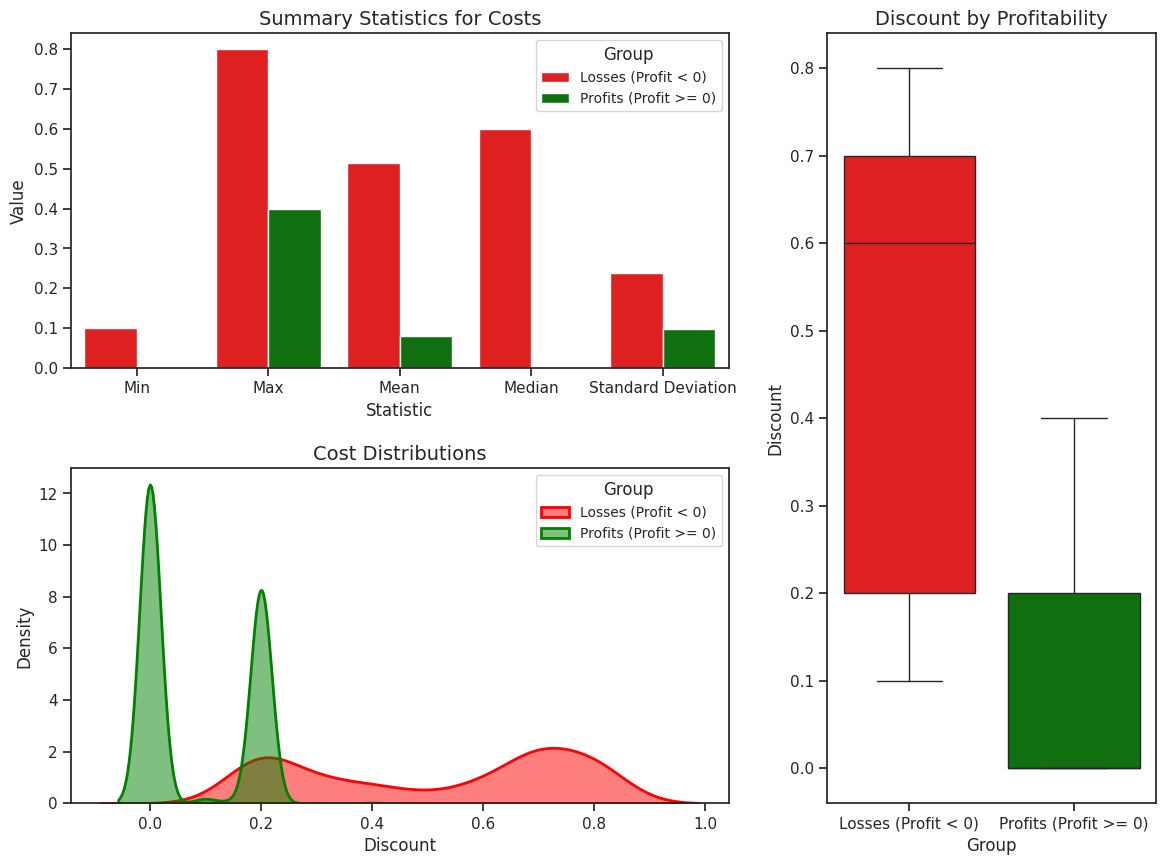

In [5]:
# Calculate stats for both groups
discount_stats_losses = dvu.calculate_discount_stats(data_losses, column='Discount')
discount_stats_profits = dvu.calculate_discount_stats(data_profits, column='Discount')

# Combine the stats into a single DataFrame
discount_summary_table = pd.DataFrame({
    'Statistic': discount_stats_losses.keys(),
    'Losses (Profit < 0)': discount_stats_losses.values(),
    'Profits (Profit >= 0)': discount_stats_profits.values()
})

# Visualize the metrics and save the figure
save_path = "/content/loss_discount_sumamry_stats.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Call the function
dvu.plot_discount_analysis_grid(data_losses, data_profits, discount_summary_table, column='Discount')

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Profits and Discounts Analysis

1. **Discount Range and Averages**:
   - **Losses**: Discounts range from **10%** to **80%**, with an **average discount** of **51.47%**, indicating a strong correlation between high discounts and loss-making transactions.
   - **Profits**: Discounts range from **0%** to **40%**, with **median of 0%**, an **average discount** of only **8.12%**, reflecting that profitable transactions typically involve minimal discounting.

2. **Profit Range and Averages**:
   - **Losses**: Profits range as high as **-\$1,181.28**, with an **average profit** of **-\$40.88**, clearly reflecting significant losses.
   - **Profits**: Profits range from **\$0.00** to **\$220.49**, with an **average profit** of **\$20.92**, showing much healthier financial outcomes for profitable transactions.

3. **Central Tendency (Median)**:
   - **Losses**: The **median discount** is **60%**, highlighting that most loss-making transactions involve steep discounts.
   - **Profits**: The **median discount** is **0%**, suggesting that the majority of profitable transactions do not rely on discounts to drive sales.

4. **Variation in Discounts (Spread)**:
   - **Losses**: The **standard deviation** of discounts is **23.76%**, showing a wide variability, possibly from inconsistent discounting strategies.
   - **Profits**: The **standard deviation** of discounts is only **9.82%**, reflecting tighter control over discounting.


In [6]:
# Generate descriptive statistics for losses and profits
losses_stats = data_losses[['Profit', 'Discount']].describe().transpose()
profits_stats = data_profits[['Profit', 'Discount']].describe().transpose()

# Add a column to indicate whether the stats are for losses or profits
losses_stats['Category'] = 'Losses'
profits_stats['Category'] = 'Profits'

# Combine the two tables into a single DataFrame
combined_stats = pd.concat([losses_stats, profits_stats])

# Move the 'Category' column to the front for clarity
combined_stats = combined_stats.reset_index().rename(columns={'index': 'Metric'})
combined_stats = combined_stats[['Category', 'Metric'] + [col for col in combined_stats.columns if col not in ['Category', 'Metric']]]

# Display the combined table
combined_stats

,Category,Metric,count,mean,std,min,25%,50%,75%,max
0,Losses,Profit,776.0,-40.877741,82.413352,-1181.2824,-44.1855,-14.3856,-5.698125,-0.2685
1,Losses,Discount,776.0,0.514652,0.237637,0.1000,0.2000,0.6000,0.700000,0.8000
2,Profits,Profit,3623.0,20.916086,28.072311,0.0000,4.3281,10.0485,24.222300,220.4853
3,Profits,Discount,3623.0,0.081162,0.098241,0.0000,0.0000,0.0000,0.200000,0.4000


### **Discount Statistics Summary Anlaysis**

1. **Key Comparisons**:
   - **Mean Discount**: Loss-making transactions have a significantly higher **mean discount (51.47%)** compared to profitable transactions (8.12%), indicating discounts are more aggressively applied to loss-making items.
   - **Median Discount**: Discounts in losses are **60.00%**, while profitable transactions often have no discount (0%), highlighting a stark difference in pricing strategies.
   - **Maximum Discount**: Losses reach a **maximum discount of 80%**, double the **40%** seen in profitable transactions, suggesting over-discounting may drive losses.

2. **Distribution Differences**:
   - Losses exhibit greater variability, with a **standard deviation of 23.76%**, compared to only 9.82% for profits. This wide range underscores inconsistent discounting practices in loss-making transactions.
---

### **Key Takeaways**
1. **Deep Discounts Drive Losses**:
   - Loss-making transactions are characterized by significantly higher and more variable discounts.
   - Over 50% of loss-making transactions have discounts of 60% or higher.

2. **Profits Favor Low or No Discounts**:
   - Profitable transactions typically have no discount or very minimal discounts (average of 8.1%).

3. **Strategic Discounting Is Necessary**:
   - Review and refine discounting policies, particularly for transactions approaching 50%-80% discounts.
   - Implement thresholds or rules to limit excessive discounts in low-margin scenarios.

4. **Focus on Standardization**:
   - The variability in discounting for loss-making transactions suggests a need for more consistent discounting practices to align with profitability goals.



## Discount & Losses by Year

In [7]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits = dpu.calculate_aggregate_metrics(df, group_by_columns=['Order Year'])
table_profits

,Order Year,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,2014,-5094.7210,-77.652874,-36.527573,16819.9770,11725.2560,0.534420,982,468,24.668116
1,2015,-6355.1013,-72.897417,-34.182110,22368.9241,16013.8228,0.523032,1150,559,24.755537
2,2016,-8898.9544,-64.173640,-32.491276,33886.3454,24987.3910,0.503796,1642,788,24.947869
3,2017,-11372.3503,-72.395193,-33.967952,40499.6347,29127.2844,0.508352,1959,970,25.030467


Figure saved as /content/profit_by_year_3x3.png


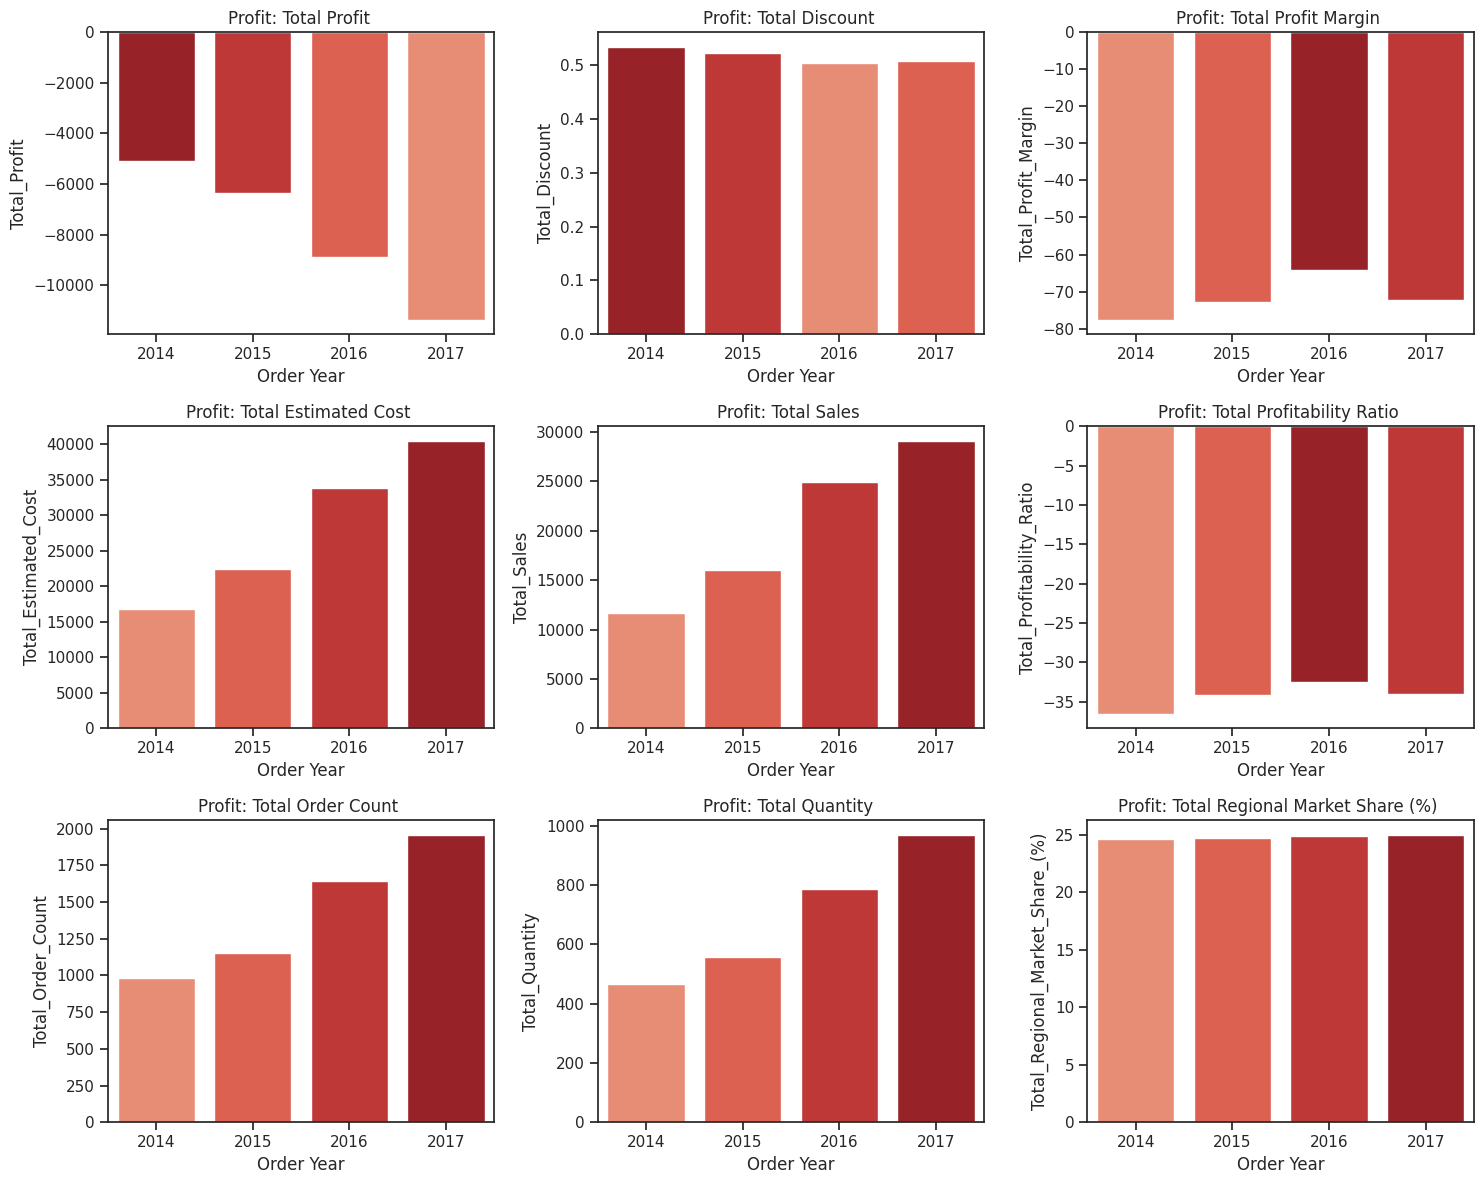

In [9]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Discount',
    'Total_Profit_Margin',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_year_3x3.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits,
    metrics=metrics,
    group_by_column='Order Year',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### **Losses** and **Discounts** by Year Analysis

1. **Increasing Losses Over Time**:
   - Losses increased significantly from **-\$5,094.72 in 2014** to **-\$11,372.35 in 2017**, more than doubling over the four years. This trend highlights escalating inefficiencies and warrants immediate attention.

2. **Profit Margins Show Persistent Weakness**:
   - Margins remain consistently negative, ranging from **-77.65% in 2014** to **-72.39% in 2017**, indicating sustained pricing or cost-related issues.

3. **Discount Levels**:
   - Discounts are relatively stable across the years, from **0.53 in 2014** to **0.51 in 2017**, suggesting that excessive discounting is a persistent problem that has not been adequately addressed.

4. **Rising Costs and Sales**:
   - **Estimated costs** rose steeply from **\$16,819.98 in 2014** to **\$40,499.63 in 2017**, reflecting inefficiencies in cost control.
   - **Sales** increased proportionally, from **\$11,725.26 in 2014** to **\$29,127.28 in 2017**, yet losses continue to grow, showing that higher sales volumes are not translating into profitability.

5. **Key Focus Areas**:
   - **2017** shows the highest losses and discounts, suggesting that the discount strategy and cost structure need critical evaluation. Improved discount management and cost reduction could substantially reduce losses.

## Region

In [10]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits_region = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region'])
table_profits_region

,Region,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,-16128.3345,-108.814011,-43.695413,41594.8857,25466.5512,0.594506,2368,1225,21.819594
1,East,-8084.3891,-42.716919,-26.974108,37155.7851,29071.3960,0.468182,1634,709,29.548188
2,South,-2768.4291,-51.456492,-31.323555,11949.1321,9180.7030,0.518349,786,397,17.052140
3,West,-4739.9743,-40.195122,-23.745576,22875.0783,18135.1040,0.384146,945,454,31.580078


Figure saved as /content/profit_by_region_3x3.png


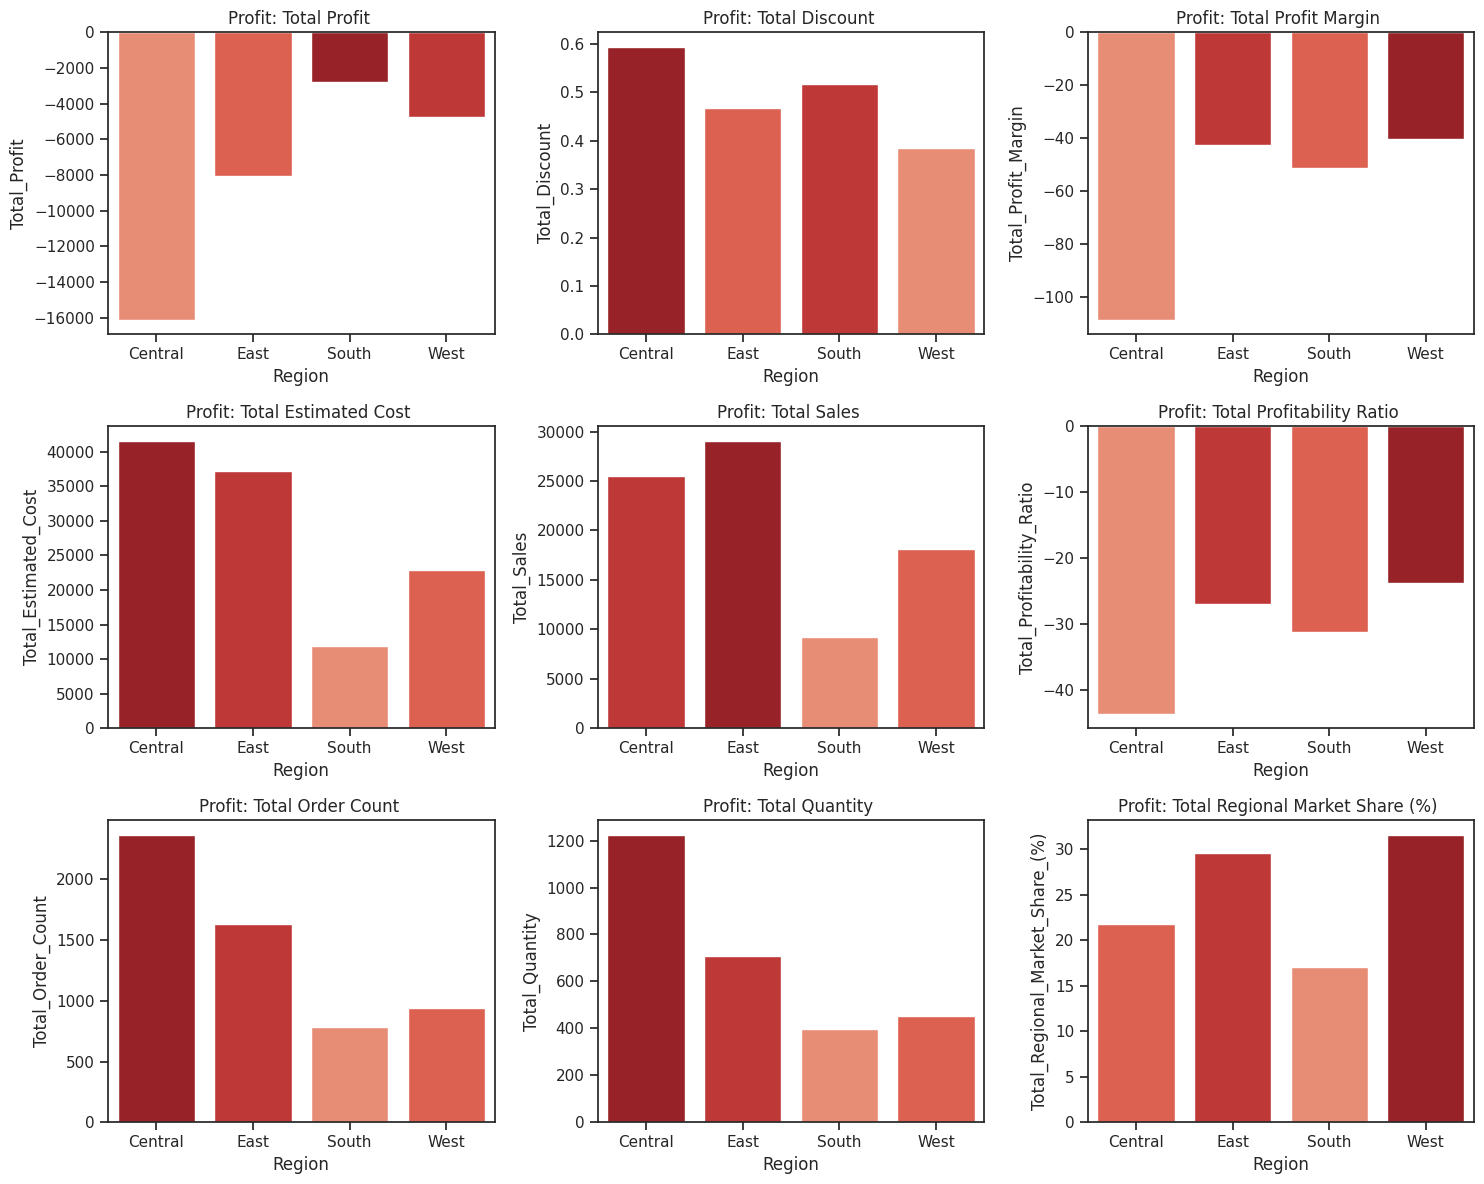

In [11]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Discount',
    'Total_Profit_Margin',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_region_3x3.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits_region,
    metrics=metrics,
    group_by_column='Region',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Discount & Profit by Region Analysis

1. **Central Region**:
   - **Highest losses** at **-\$16,128.33**, with a very poor **profit margin of -108.81%**, indicating deep inefficiencies.
   - **Highest average discount** at **0.59**, which likely contributes significantly to the profit challenges. Pricing strategies should be reviewed immediately.

2. **East Region**:
   - Losses at **-\$8,084.39**, with a **profit margin of -42.72%**, reflecting significant but manageable inefficiencies.
   - Discounts are moderate at **0.47**, suggesting there’s room for cost or pricing optimization to improve profitability.

3. **South Region**:
   - **Lowest losses** at **-\$2,768.43**, with a **profit margin of -51.46%**, showing moderate inefficiencies compared to other regions.
   - Discounts are relatively high at **0.52**, suggesting that profit margins could be improved by reducing discounts.

4. **West Region**:
   - Losses of **-\$4,739.97**, with the **best profit margin of -40.20%**, indicating relatively better control over inefficiencies.
   - **Lowest average discount** at **0.38**, demonstrating better pricing discipline compared to other regions.

### Key Takeaways:
- The **Central Region** requires immediate attention, as it suffers the highest losses and discounts, which are unsustainable.
- The **East and South Regions** can benefit from tighter discount management and cost optimization to improve profit margins.
- The **West Region** performs the best in terms of discount control and profit margin but still incurs losses, suggesting further refinements could be made to reach profitability.

## Region & State

In [50]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits_region_state = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region', 'State'])
table_profits_region_state

,Region,State,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,Illinois,-6415.9455,-113.092166,-46.175773,16876.9265,10460.9810,0.616935,930,495,21.819594
1,Central,Texas,-9712.3890,-106.161555,-42.157590,24717.9592,15005.5702,0.580600,1438,730,21.819594
2,East,Connecticut,-15.5826,-8.571429,-7.894737,197.3796,181.7970,0.300000,6,1,29.548188
3,East,Delaware,-37.1124,-18.571429,-15.662651,236.9484,199.8360,0.300000,6,4,29.548188
4,East,Maryland,-23.9372,-10.000000,-9.090909,263.3092,239.3720,0.300000,4,2,29.548188
5,East,New Jersey,-31.3722,-12.857143,-11.392405,275.3782,244.0060,0.300000,7,2,29.548188
6,East,New York,-1178.9400,-24.223856,-18.281266,5974.3100,4795.3700,0.335294,121,41,29.548188
7,East,Ohio,-2832.1161,-47.901120,-29.611469,11820.3921,8988.2760,0.505882,652,300,29.548188
8,East,Pennsylvania,-3951.5718,-42.996523,-27.053993,18133.5668,14181.9950,0.467257,828,355,29.548188
9,East,Rhode Island,-13.7568,-5.714286,-5.405405,254.5008,240.7440,0.300000,10,4,29.548188


Figure saved as /content/Central_loss_cost.png


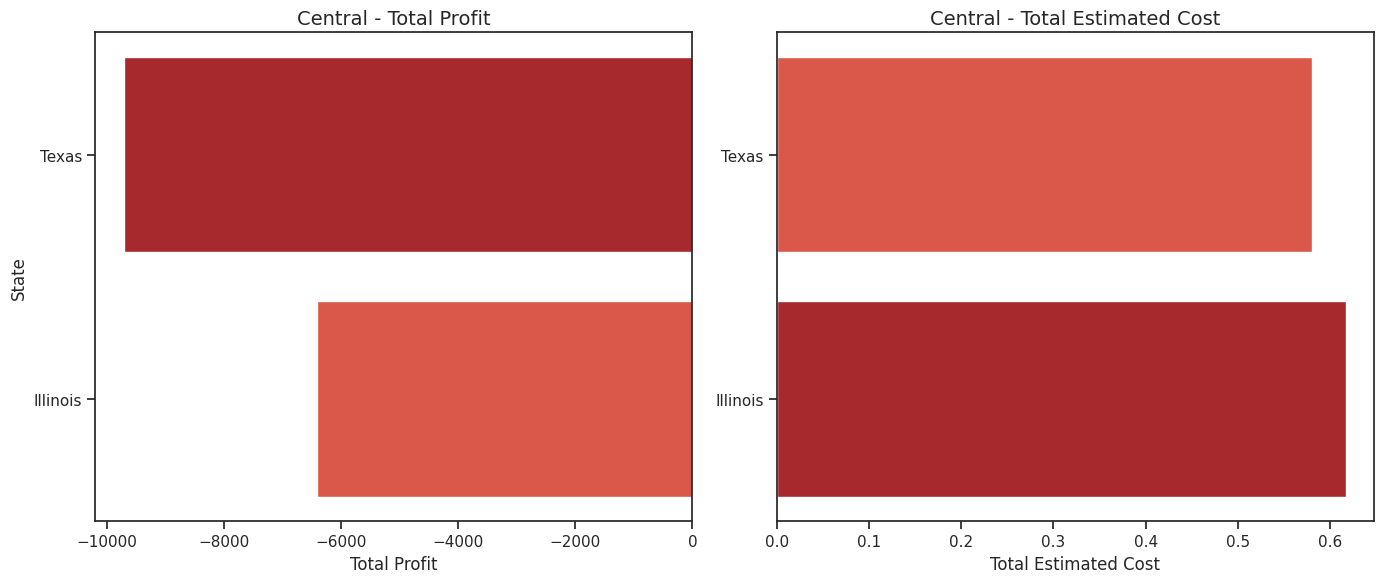

Figure saved as /content/East_loss_cost.png


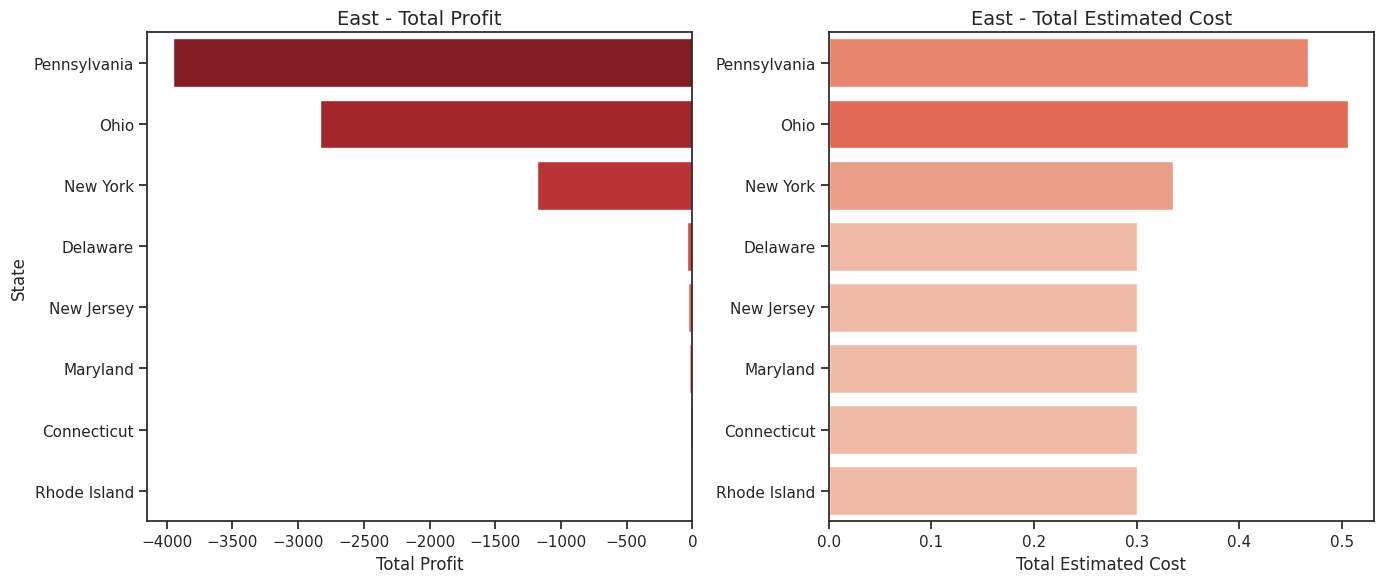

Figure saved as /content/South_loss_cost.png


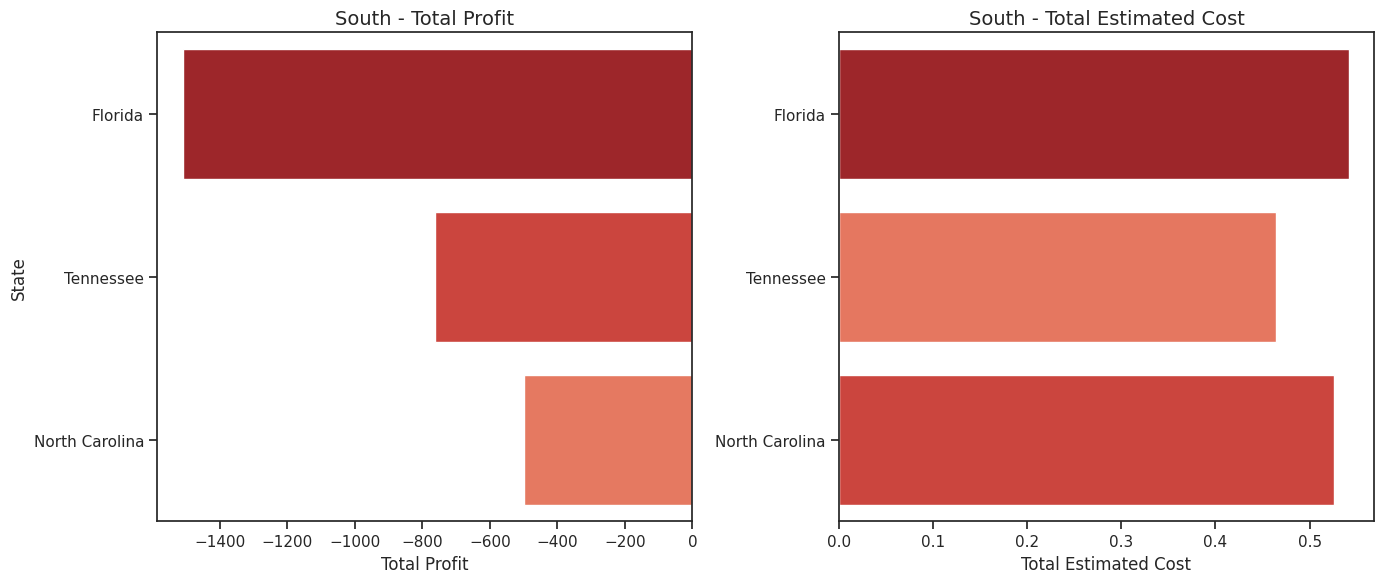

Figure saved as /content/West_loss_cost.png


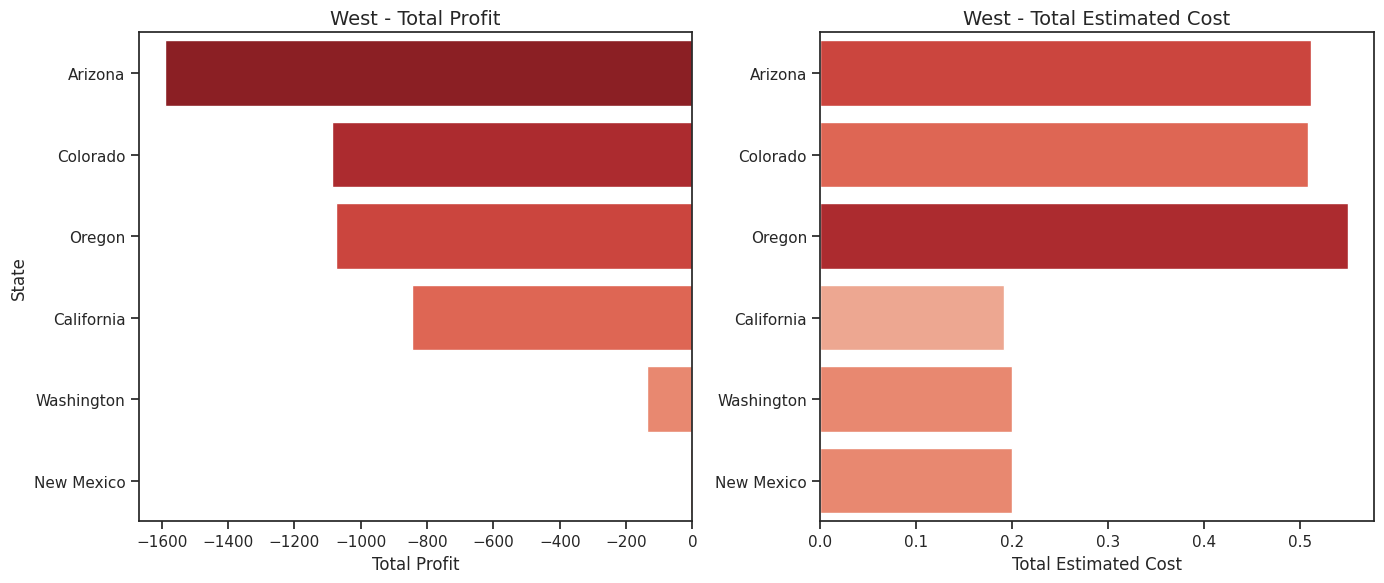

In [51]:
import warnings
warnings.filterwarnings("ignore")

# Define palettes
palette1 = "Reds_r"
palette2 = "Reds"

# Filepath template
save_path_template = "/content/{group}_loss_cost.png"

# Call the function
plot_discount_loss_grid_1x2(
    data=table_profits_region_state,
    group_by_columns=['Region', 'State'],
    discount_column="Total_Discount",
    profit_column="Total_Profit",
    order_by='Total_Profit',
    palette1=palette1,
    palette2=palette2,
    save_path_template=save_path_template
)

### Region & State Analysis
### Analysis of Loss and Discounts by Region and State

1. **High Losses in the Central Region**:
   - **Illinois** and **Texas** show the highest losses at **-\$6,415.95** and **-\$9,712.39**, respectively. These states also have the highest discounts in the region, **0.62** (Illinois) and **0.58** (Texas), suggesting that excessive discounting is a key driver of losses.
   - Estimated costs in both states are substantial, with **\$24,717.96** in Texas and **$16,876.93** in Illinois, emphasizing inefficient spending.

2. **East Region: Moderate Losses with Low Discounts**:
   - **Pennsylvania** and **Ohio** stand out with losses of **-\$3,951.57** and **-\$2,832.12**, but their discounts are moderate at **0.47** and **0.51**, respectively.
   - **New York** shows a large loss of **-\$1,178.94**, though its lower discount level (**0.33**) indicates factors beyond discounting may be at play, such as high costs (**$5,974.31**) relative to sales.

3. **South Region: Consistent Losses and Discounts**:
   - **Florida** and **Tennessee** exhibit notable losses of **-\$1,509.94** and **-\$761.05**, with discount rates of **0.54** and **0.46**. The high discounts correlate strongly with their losses, especially in Florida, where costs (**$6,484.87**) significantly outweigh sales.

4. **West Region: Diverse Loss Patterns**:
   - **Arizona** and **California** show contrasting patterns:
     - Arizona has a significant loss (**-\$1,590.91**) with a high discount rate (**0.51**), highlighting discounting as a probable driver of losses.
     - California has a lower discount rate (**0.19**) but still incurs losses (**-\$844.10**), suggesting other cost-related inefficiencies.
   - **Oregon** and **Colorado** have high losses (**-\$1,075.89** and **-\$1,085.99**) with discount rates exceeding **0.50**, reinforcing the pattern of excessive discounting.

5. **Actionable Insights**:
   - Regions with the highest discount rates (**Central, South, West**) align with the most significant losses, underscoring the need to reevaluate discounting policies.
   - A deeper investigation into cost inefficiencies in high-loss states like Texas, Illinois, Arizona, and Florida is critical to identify opportunities for cost reduction and revenue alignment.

## Category

In [45]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits_category = dpu.calculate_aggregate_metrics(df, group_by_columns=['Category'])
table_profits_category

,Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Furniture,-14388.3928,-35.963319,-22.256118,67026.0080,52637.6152,0.382266,2047,923,25.687639
1,Office Supplies,-15071.9634,-104.874498,-45.656145,33957.6924,18885.7290,0.643614,3024,1581,23.878809
2,Technology,-2260.7708,-20.307229,-15.567348,12591.1808,10330.4100,0.313253,662,281,27.256786


### Category Analysis

1. **Office Supplies**:
   - Largest losses of **-\$15,071.96** and an alarming **profit margin of -104.87%**, pointing to severe financial underperformance.
   - Discounts are the highest among the categories (**0.64 average discount**), likely contributing heavily to the losses.
   - Aggressive discounting is not translating to sufficient sales volume to offset losses.

2. **Furniture**:
   - High losses at **-\$14,388.39**, with a negative **profit margin of -35.96%**, indicating significant inefficiencies.
   - Discounts are moderate (**0.38 average discount**), suggesting that profitability issues may be driven more by high costs than excessive discounting.

3. **Technology**:
   - Comparatively minor losses of **-\$2,260.77**, with the smallest profit margin deficit (**-20.31%**).
   - Discounts are the lowest (**0.31 average discount**), showing better pricing discipline compared to other categories.
   - Losses here are more manageable and may be easier to address through small adjustments.

### Key Insights:
- **Office Supplies** suffers the most due to excessive discounting, which erodes profitability.
- **Furniture** faces significant losses, likely driven by operational inefficiencies rather than discounts alone.
- **Technology** demonstrates better cost and discount control, offering potential for profitability with targeted improvements.  
- Immediate focus should be on **reducing discounts in Office Supplies** and **improving efficiency in Furniture** to recover profitability.

Figure saved as /content/profit_by_category_3x3.png


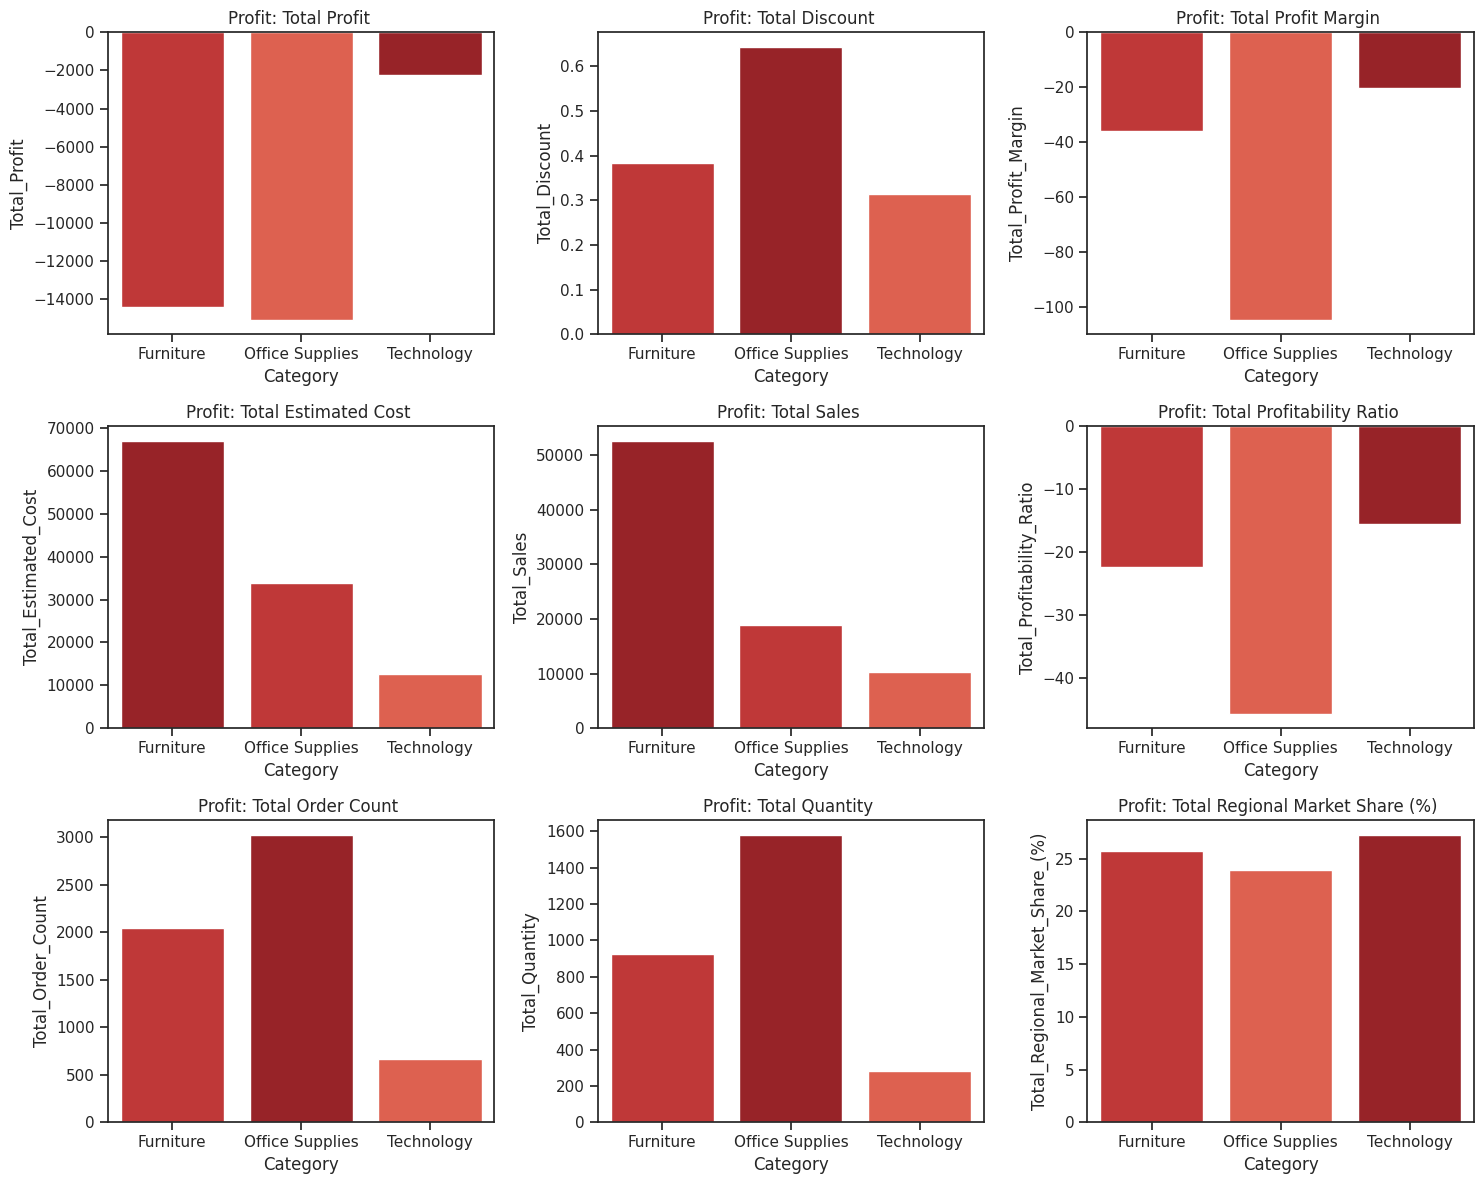

In [46]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Discount',
    'Total_Profit_Margin',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_category_3x3.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[3:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits_category,
    metrics=metrics,
    group_by_column='Category',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

In [59]:
# Grouping the data by Category and Sub-Category to calculate totals
summary_table = df.groupby(['Category', 'Sub-Category'], observed=True).agg({
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Sorting the data by total Profit in ascending order (for losses)
summary_table_category= summary_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)

# Display the results
print("\nSummary Table by Category & Sub-Category:")
summary_table_category


Summary Table by Category & Sub-Category:


,Category,Sub-Category,Profit,Discount
0,Office Supplies,Binders,-7769.3608,0.739465
1,Office Supplies,Appliances,-5417.5448,0.800000
2,Furniture,Tables,-5216.6757,0.380303
3,Furniture,Furnishings,-3537.0358,0.545000
4,Furniture,Chairs,-2867.6431,0.256842
5,Furniture,Bookcases,-2767.0382,0.355946
6,Office Supplies,Storage,-1653.5869,0.200000
7,Technology,Phones,-1534.0615,0.344681
8,Technology,Machines,-464.6674,0.633333
9,Technology,Accessories,-262.0419,0.200000


In [41]:
df.groupby('Category').agg({
    'Profit': 'sum',
    'Discount': 'mean'
})

,Profit,Discount
Category,,
Furniture,-14388.3928,0.382266
Office Supplies,-15071.9634,0.643614
Technology,-2260.7708,0.313253


### Category & Sub-Category Loss Discount Analysis

1. **Biggest Loss Drivers:**
   - **Office Supplies**: Largest losses (**\$15,071.96**), dominated by **Binders (-\$7,769.36)** and **Appliances (-\$5,417.54)**, both with extremely high discounts (**74%-80%**).
   - **Furniture**: Significant losses (**\$14,388.39**) driven by **Tables (-\$5,216.68, 38% discount)** and **Furnishings (-\$3,537.04, 55% discount)**.
   - **Technology**: Lower overall losses (**\$2,260.77**), with **Phones (-\$1,534.06, 34% discount)** and **Machines (-\$464.67, 63% discount)** as key contributors.

2. **Discount Patterns:**
   - Losses are heavily concentrated in subcategories with **discounts over 50%**, especially **Binders, Appliances, Furnishings, and Machines**.
   - **Moderate discounts (20%-40%)** also show recurring losses in **Tables, Phones, and Chairs**.






In [60]:
# Filter and reset categories for each subset of data
ft_table = summary_table_category[summary_table_category['Category'].isin(['Furniture', 'Technology'])].copy()
office_table = summary_table_category[summary_table_category['Category'].isin(['Office Supplies'])].copy()

# Reset categories for Sub-Category in each dataset
ft_table.loc[:, 'Sub-Category'] = ft_table['Sub-Category'].astype('object').astype('category')
office_table.loc[:, 'Sub-Category'] = office_table['Sub-Category'].astype('object').astype('category')

# Sort tables by Profit
ft_table_sorted = ft_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)

# Metrics to analyze
metrics = ['Profit', 'Discount']

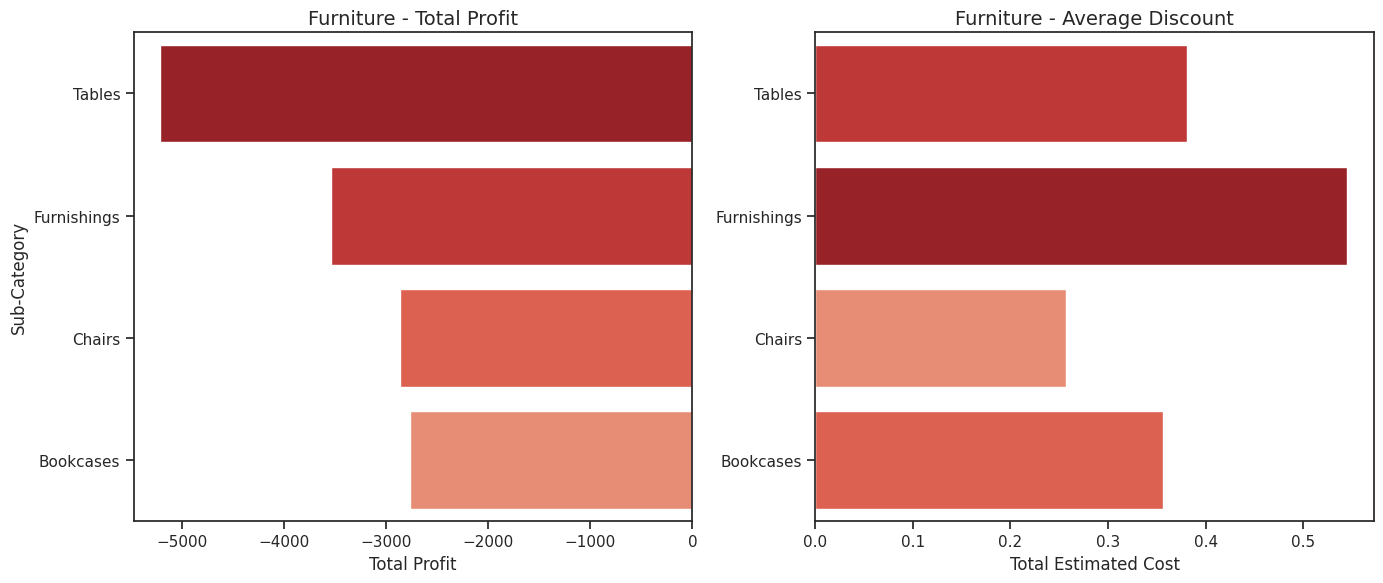

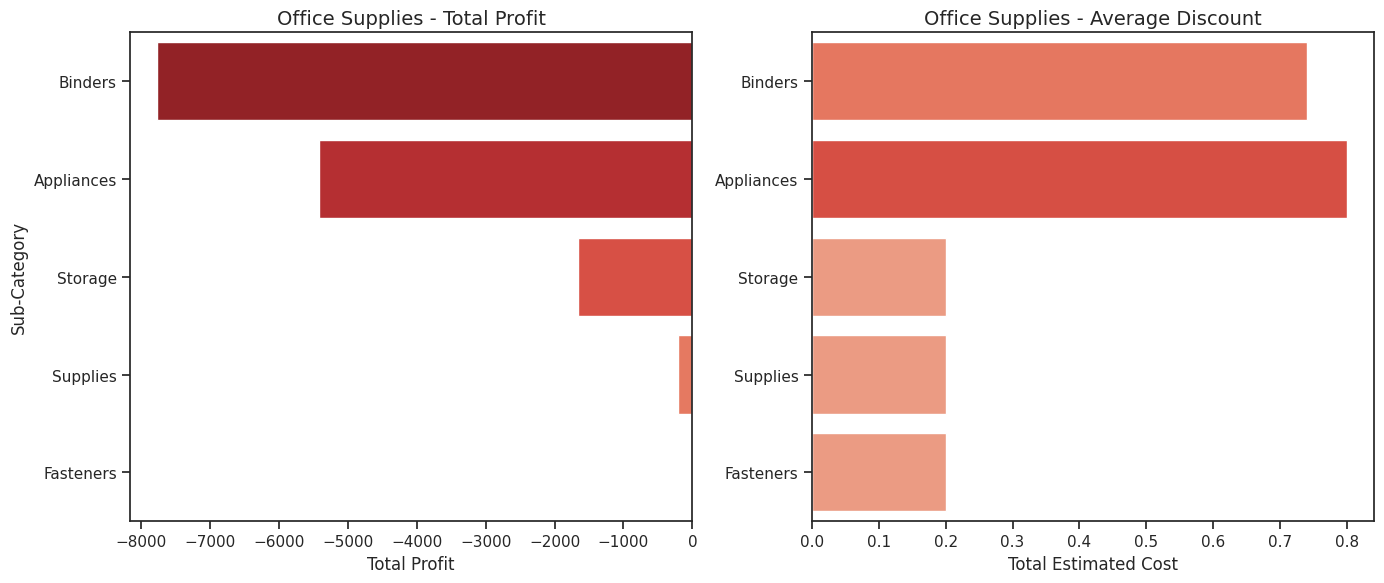

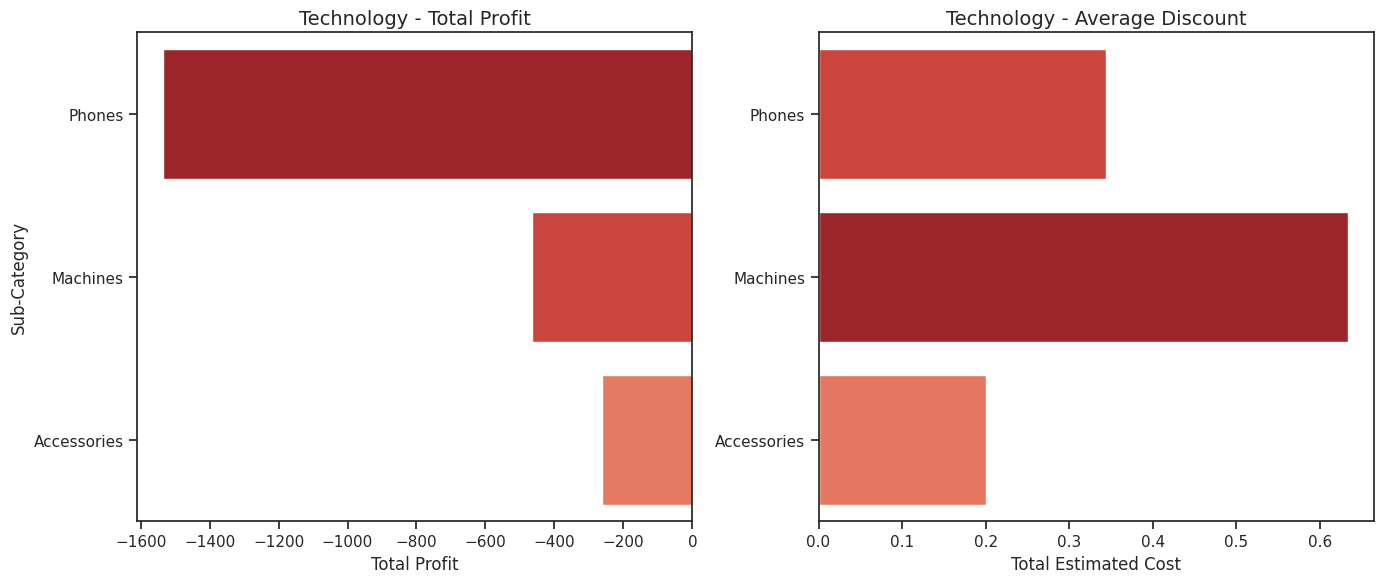

In [66]:
# Define palettes
palette1 = "Reds_r"
palette2 = "Reds"

# Filepath template
save_path_template = "/content/{group}_loss_cost.png"

# Call the function
dvu.plot_discount_loss_grid_1x2(
    data=summary_table_category,
    group_by_columns=['Category', 'Sub-Category'],
    discount_column="Discount",
    profit_column="Profit",
    palette1=palette1,
    palette2=palette2,
    order_by='Profit',
    save_path_template=save_path_template
)

In [70]:
# Grouping the data by Category, Sub-Category, and Region
summary_table = df.groupby(['Region', 'Category', 'Sub-Category'], observed=True).agg({
    'Profit': 'sum',
    'Estimated Cost': 'sum',
    'Discount': 'mean'
}).reset_index()

# Sorting the data by total Profit in ascending order (for losses)
summary_table_category = summary_table.sort_values(by='Profit', ascending=True)

# Separate data for categories
ft_table = summary_table_category[summary_table_category['Category'].isin(['Furniture', 'Technology'])].copy()
office_table = summary_table_category[summary_table_category['Category'].isin(['Office Supplies'])].copy()

# Reset categories for Sub-Category in each dataset
ft_table['Sub-Category'] = ft_table['Sub-Category'].astype('object').astype('category')
office_table['Sub-Category'] = office_table['Sub-Category'].astype('object').astype('category')

# Sort tables by Profit
ft_table_sorted = ft_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
# show the furniture table
ft_table_sorted

,Region,Category,Sub-Category,Profit,Estimated Cost,Discount
0,Central,Furniture,Furnishings,-3358.6064,7028.8824,0.600000
1,East,Furniture,Tables,-1983.7433,8908.6883,0.380769
2,West,Furniture,Bookcases,-1493.2825,4443.8775,0.403846
3,West,Furniture,Tables,-1484.7722,5650.5172,0.357895
4,East,Technology,Phones,-1374.9693,7916.0433,0.400000
5,Central,Furniture,Chairs,-1032.5475,8409.4065,0.300000
6,Central,Furniture,Tables,-973.0478,3745.4088,0.385714
7,East,Furniture,Bookcases,-952.8625,3585.7125,0.390909
8,East,Furniture,Chairs,-775.2814,6441.9314,0.292308
9,South,Furniture,Tables,-775.1124,2557.8294,0.428571


## Region, Category, Sub-Category

1. **Regions with the Highest Losses:**
   - **Central Region**:
     - **Furnishings**: The single largest loss at **$3,358.61**, with a very high discount rate (**60%**). This is a critical area for review.
     - **Chairs and Tables**: Significant losses (combined **$2,005.60**) despite moderate discount rates.
   - **East Region**:
     - **Tables**: **$1,983.74** loss with a **38% discount**. High loss potential and discounts warrant attention.
     - **Phones** (Technology): Losses of **$1,374.97** with a **40% discount**.
   - **West Region**:
     - **Bookcases**: **$1,493.28** loss at a **40% discount**.
     - **Tables**: **$1,484.77** loss with a **35% discount**.

2. **Categories with the Highest Losses:**
   - **Furniture** dominates the losses, contributing to the majority of the high-loss entries. Sub-categories of concern include:
     - **Furnishings, Tables, Chairs, and Bookcases.**
   - **Technology** incurs losses in Phones, Accessories, and Machines, but the financial impact is much lower.

3. **Discount Analysis:**
   - Subcategories with **extremely high discount rates (above 50%)** have some of the highest losses, especially:
     - **Furnishings (Central Region, 60%)**.
     - **Machines (East and South Regions, 70% and 50%).**
   - Losses taper off significantly as discounts reduce to **20%-30%**, indicating a direct correlation between high discounts and profitability challenges.

4. **Recommendations to Reduce Losses:**
   - **Focus on Reducing Discounts for Key Subcategories**:
     - Furnishings (Central Region).
     - Tables (East, Central, South Regions).
     - Bookcases (West Region).
   - **Reassess Pricing and Demand**:
     - High-discount, high-loss categories like Furnishings and Tables may need price adjustments or discontinuation if not profitable.
   - **Improve Inventory and Sales Strategy**:
     - Central, East, and West regions show recurring losses in similar subcategories, suggesting inefficiencies in pricing, promotions, or inventory management.

5. **Strategic Focus:**
   - **Quick Wins**:
     - Reducing discounts in Furnishings and Tables can have an immediate impact.
   - **Long-Term Actions**:
     - Investigate why discounts are so high in certain subcategories.
     - Explore customer demand and competition for Technology losses (Phones, Machines) to optimize strategies.

---

### Action Plan:
1. **Set Discount Thresholds**:
   - Cap discounts for Furniture and Technology subcategories at **30%** and monitor profitability.
2. **Regional Analysis**:
   - Central Region requires urgent attention, particularly for Furnishings and Chairs.
3. **Subcategory Reviews**:
   - Prioritize reviewing high-loss, high-discount subcategories like Furnishings, Tables, and Bookcases.



###Category Furniture & Tech Analysis

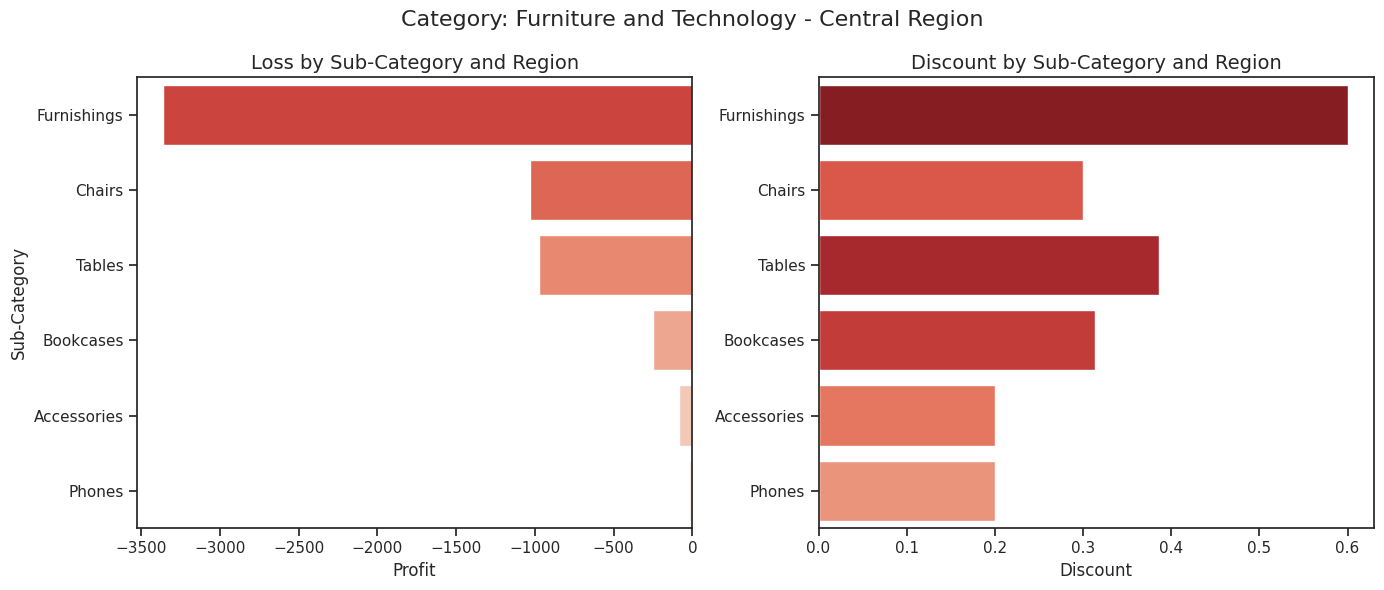

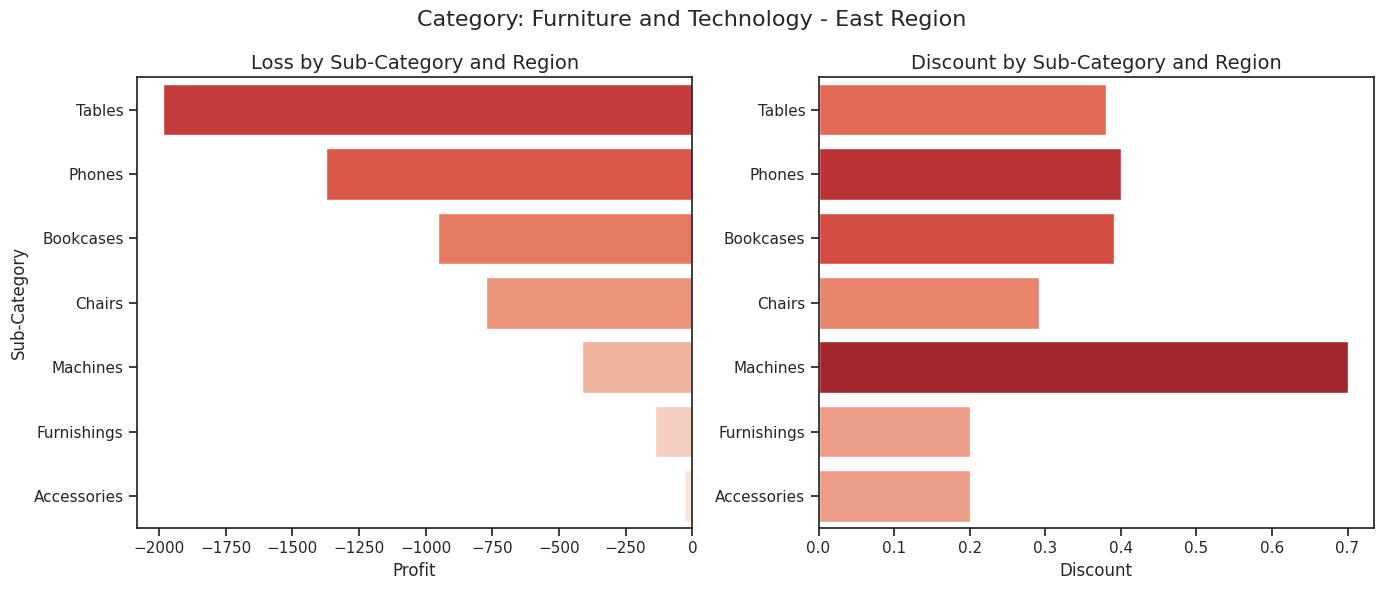

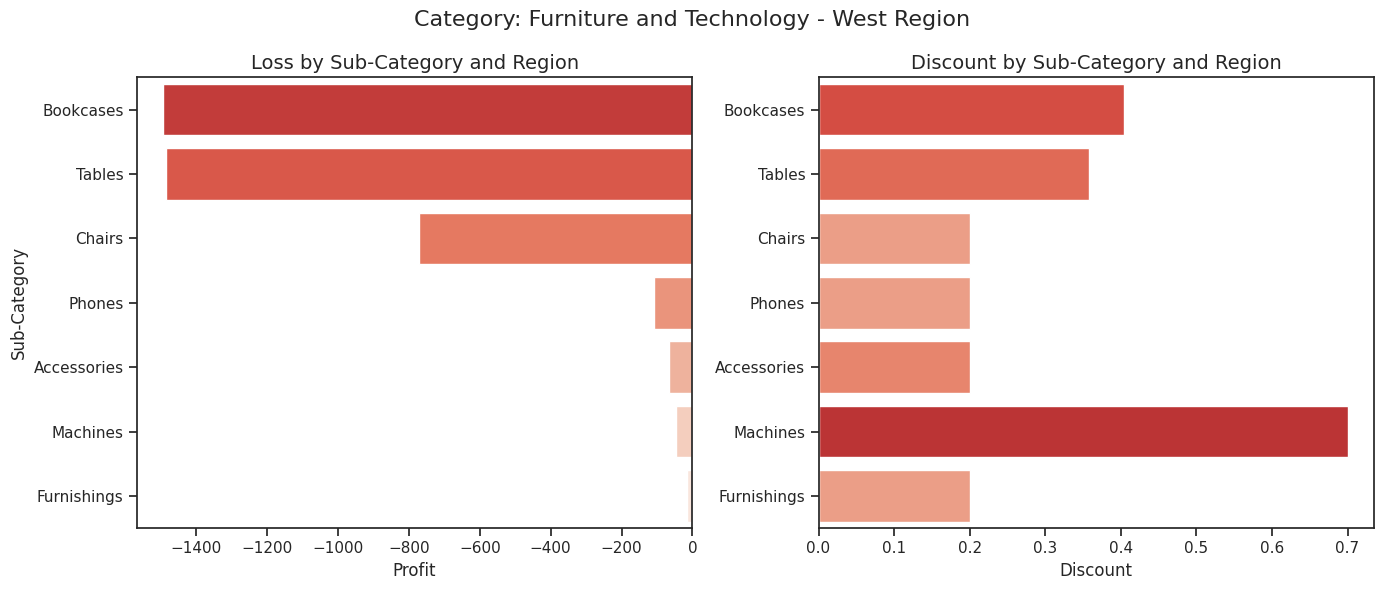

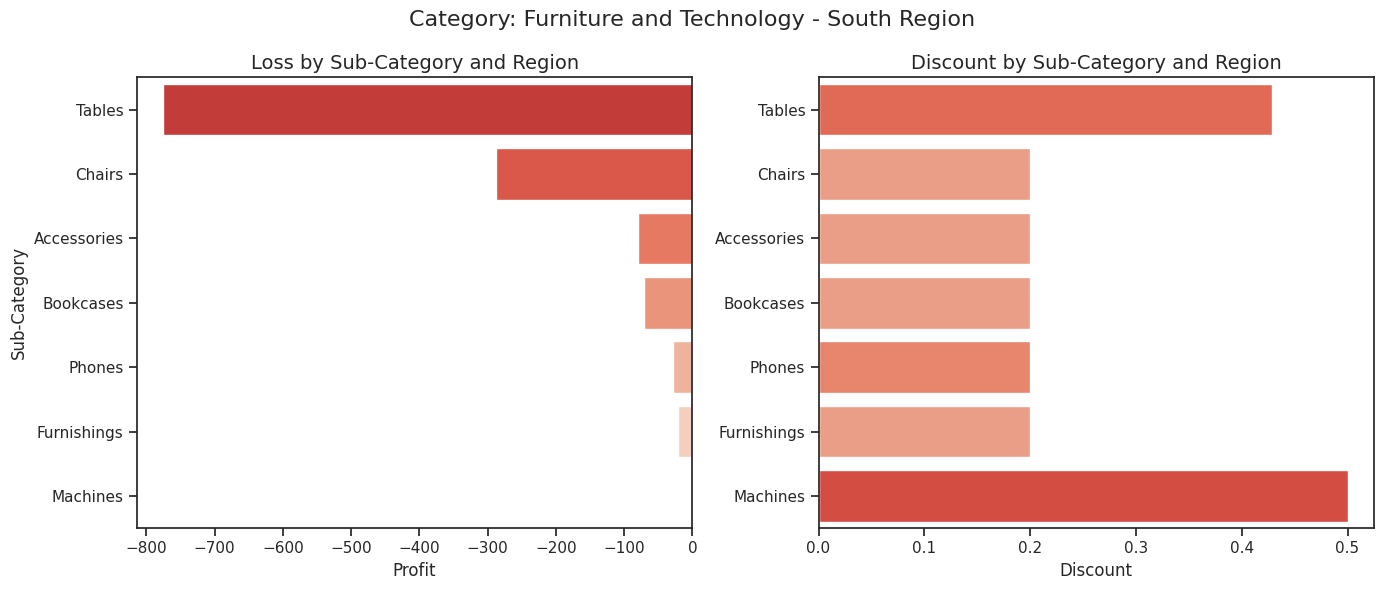

In [56]:
# Loop through regions and plot for each
regions = df['Region'].unique()

# Define palettes
palette1 = "Reds_r"
palette2 = "Reds"

for r in regions:
    # Filter data for the current region
    ft_table_region = ft_table_sorted[ft_table_sorted['Region'] == r]

    # Plot Furniture and Technology data
    dvu.plot_category_subcategory_loss_grid_with_region(
        data=ft_table_region,
        category_column='Category',
        sub_category_column='Sub-Category',
        region_column='Region',
        discount_column='Discount',
        profit_column='Profit',
        title=f"Furniture and Technology - {r} Region",
        palette1=palette1,
        palette2=palette2
    )

###Office Supplies by Region Plots

In [71]:
office_table_sorted

,Region,Category,Sub-Category,Profit,Estimated Cost,Discount
0,Central,Office Supplies,Appliances,-5417.5448,7565.0128,0.8
1,Central,Office Supplies,Binders,-4203.2011,6771.5551,0.8
2,East,Office Supplies,Binders,-1828.9757,4267.5467,0.7
3,South,Office Supplies,Binders,-1250.7998,2957.9258,0.7
4,Central,Office Supplies,Storage,-735.1298,4525.5138,0.2
5,West,Office Supplies,Binders,-486.3842,1167.2342,0.7
6,East,Office Supplies,Storage,-427.4350,2419.0110,0.2
7,West,Office Supplies,Storage,-247.5397,1467.2597,0.2
8,South,Office Supplies,Storage,-243.4824,1497.7224,0.2
9,East,Office Supplies,Supplies,-152.3524,851.8004,0.2


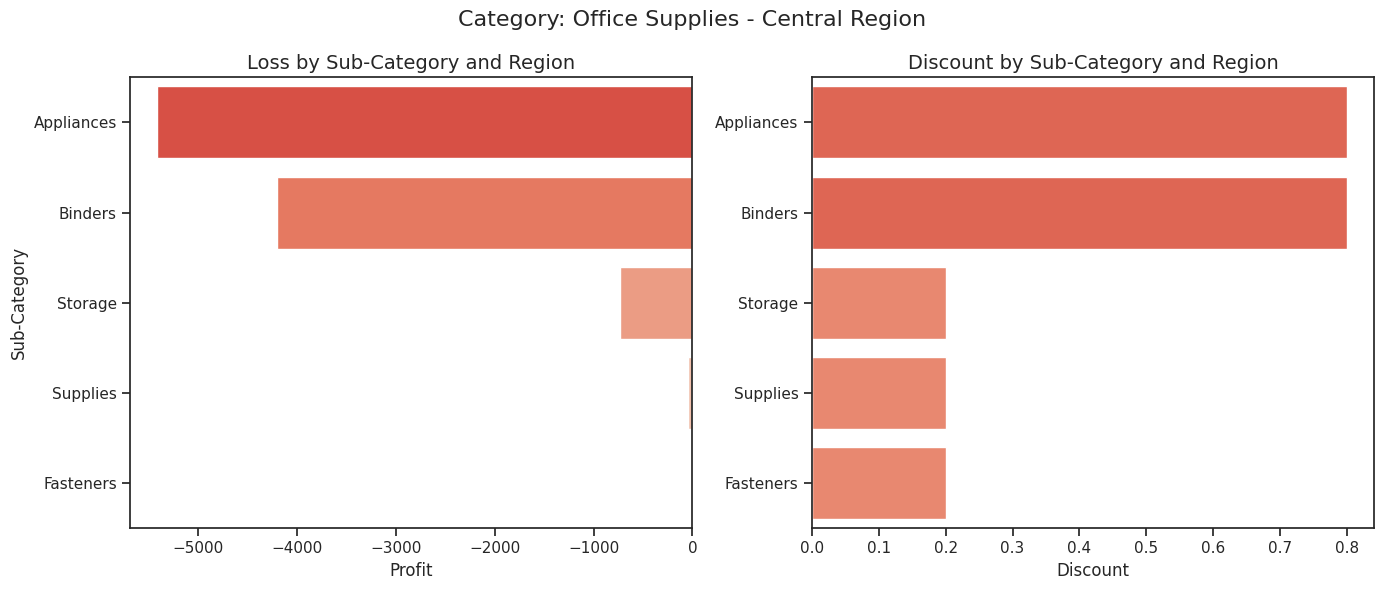

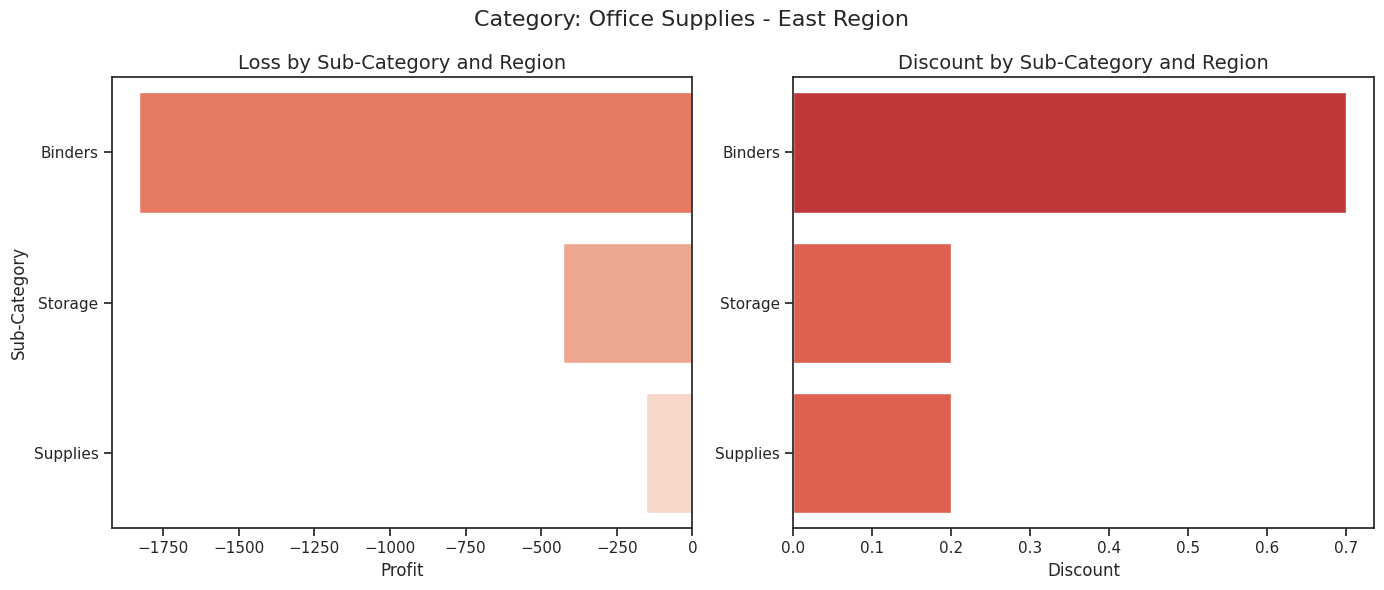

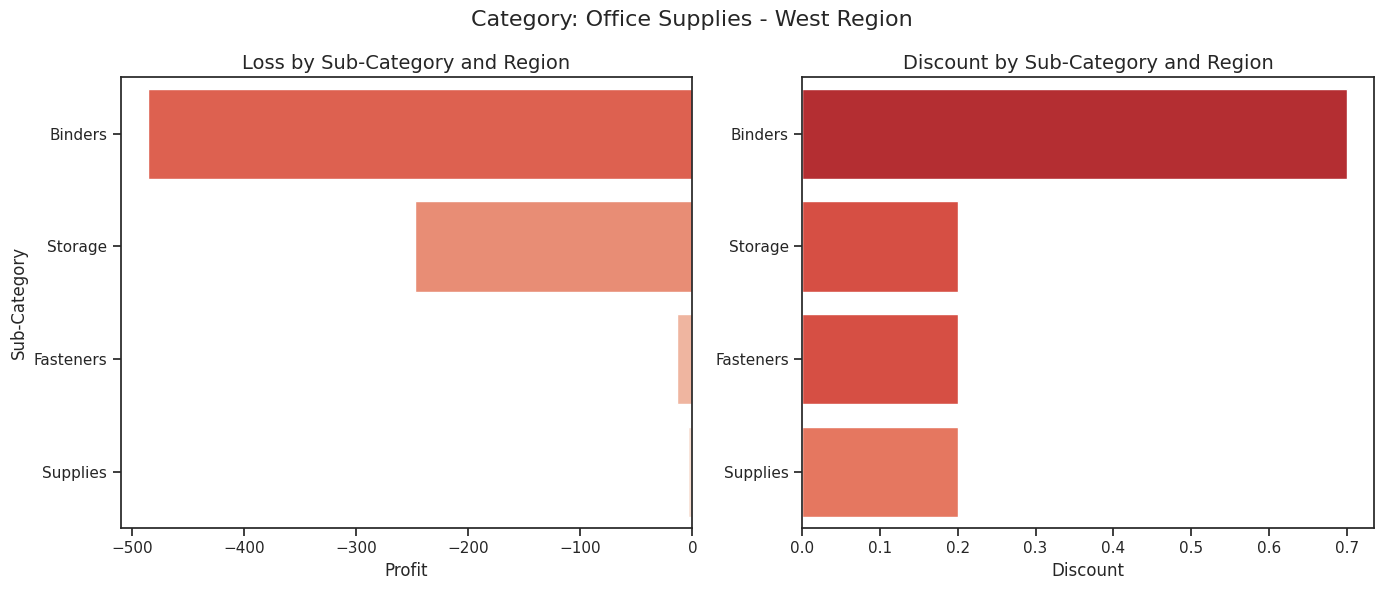

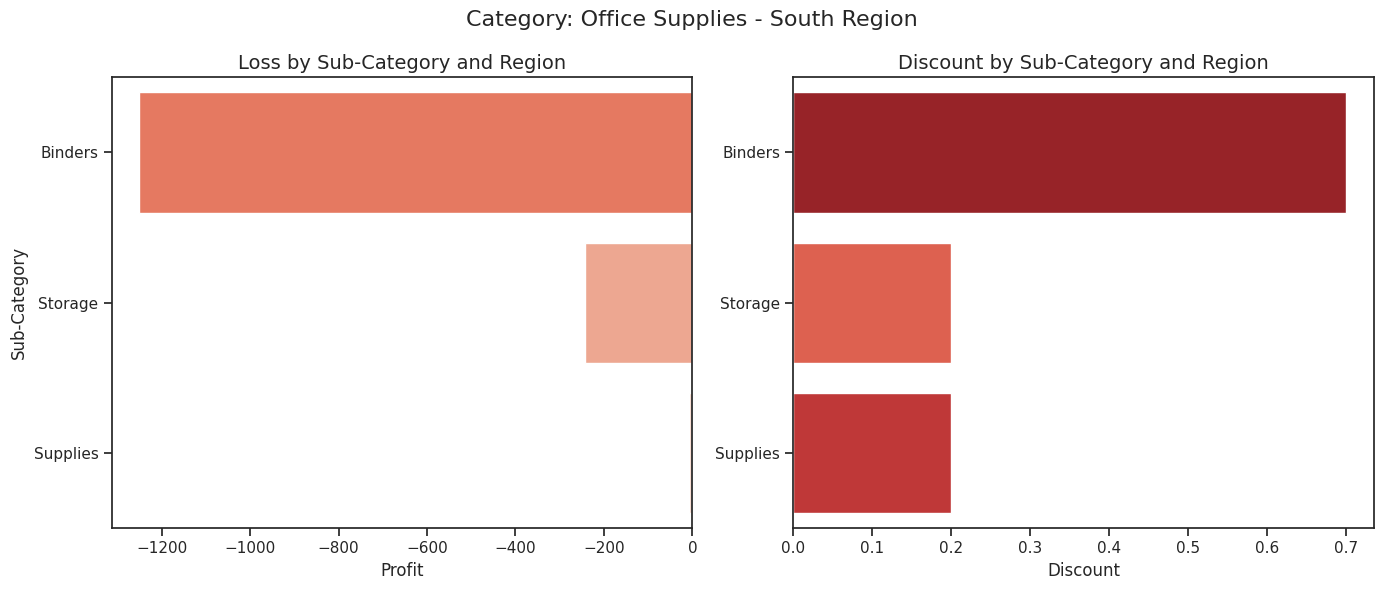

In [72]:
# Loop through regions and plot for each
regions = df['Region'].unique()

# Define palettes
palette1 = "Reds_r"
palette2 = "Reds"

for r in regions:
    # Filter data for the current region
    office_table_region = office_table_sorted[office_table_sorted['Region'] == r]

    # Plot Furniture and Technology data
    dvu.plot_category_subcategory_loss_grid_with_region(
        data=office_table_region,
        category_column='Category',
        sub_category_column='Sub-Category',
        region_column='Region',
        discount_column='Discount',
        profit_column='Profit',
        title=f"Office Supplies - {r} Region",
        palette1=palette1,
        palette2=palette2
    )

### Office & Region Analysis

1. **Biggest Loss Drivers:**
   - **Binders**:
     - The largest loss driver, with a total loss of **$7,769.36** across all regions.
     - Highest losses in the **Central Region (-$4,203.20)** and **East Region (-$1,828.98)**, both linked to very high discounts (**70%-80%**).
   - **Appliances (Central Region)**:
     - Significant loss of **$5,417.54**, also driven by an **80% discount**.
   - **Storage**:
     - Losses total **$1,653.59**, distributed across all regions. Discounts are lower at **20%**, suggesting inefficiencies unrelated to aggressive pricing.

2. **Discount Patterns:**
   - Extremely high discounts (**70%-80%**) correlate with the largest losses, especially in **Binders and Appliances**.
   - Subcategories with moderate discounts (**20%**) like **Storage** and **Supplies** still incur smaller losses, indicating potential overstock or low demand.

---

### Recommendations:

1. **Focus on High-Discount Subcategories**:
   - **Binders** and **Appliances** in the **Central and East Regions** need immediate attention. Reducing discounts from **70%-80%** to below **50%** could significantly reduce losses.

2. **Reevaluate Storage Strategy**:
   - Despite low discounts (**20%**), **Storage** incurs consistent losses across all regions. Investigate demand, inventory, and pricing to improve profitability.

## Data Utils Script

In [3]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving core metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Estimated Cost
    data['Estimated Cost'] = data['Sales'] - data['Profit']

    # 3. Profitability Ratio
    # Avoid division by zero errors by checking non-zero estimated cost
    data['Profitability Ratio'] = data.apply(
        lambda row: (row['Profit'] / row['Estimated Cost']) * 100 if row['Estimated Cost'] != 0 else 0,
        axis=1
    )

    # 4. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # 5. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    total_sales = data['Sales'].sum()
    regional_market_share = (region_sales / total_sales) * 100

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['Regional Market Share (%)'] = data['Region'].map(region_sales / total_sales * 100)

    # Convert relevant columns to categorical
    categorical_columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
    for column in categorical_columns:
        data[column] = data[column].astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # # Visualize unique value counts
    # palette = sns.color_palette("Pastel2", len(filtered_counts))
    # plt.figure(figsize=(9, 5))
    # filtered_counts.sort_values(ascending=False).plot(
    #     kind='bar',
    #     color=palette,
    #     edgecolor='black'
    # )
    # plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    # plt.xlabel('Columns', fontsize=12)
    # plt.ylabel('Number of Unique Categories', fontsize=12)
    # plt.xticks(rotation=45, ha='right', fontsize=10)
    # plt.grid(axis='y', linestyle='--', alpha=0.3)
    # plt.tight_layout()
    # plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Quarter'] = data['Order Date'].dt.quarter
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Year', 'Order Month', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data, columns=None):
    """
    Standardizes categorical columns by converting their values to title case.
    If `columns` is None, all categorical columns are standardized.
    """
    if columns is None:
        columns = data.select_dtypes(include='category').columns

    for column in columns:
        if column in data.columns:
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data, subset=None):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.

    Parameters:
    - data: DataFrame
        The dataset to remove duplicates from.
    - subset: list or None, optional
        Columns to consider for identifying duplicates. If None, all columns are used.

    Returns:
    - DataFrame: A new DataFrame with duplicates removed.
    """
    initial_shape = data.shape
    # Drop duplicates using the provided subset or across all columns if subset is None
    data = data.loc[~data.duplicated(subset=subset)].copy()
    removed_rows = initial_shape[0] - data.shape[0]
    print(f"Removed {removed_rows} duplicate rows.")
    return data


def calculate_aggregate_metrics(data, group_by_columns):
    """
    Dynamically calculates aggregate metrics for specified groupings.

    Parameters:
    - data: DataFrame
        The dataset to calculate metrics from.
    - group_by_columns: list
        The columns to group the data by.

    Returns:
    - DataFrame: A new DataFrame with the aggregated metrics.
    """
    # Define the aggregation columns and their operations
    aggregation_columns = {
        'Profit': 'sum',
        'Profit Margin': 'mean',
        'Profitability Ratio': 'mean',  # New metric
        'Estimated Cost': 'sum',
        'Sales': 'sum',
        'Discount': 'mean',
        'Order Count': 'sum',
        'Quantity': 'sum',
        'Regional Market Share (%)': 'mean'  # New metric
    }

    # Perform the group-by operation and apply aggregations
    aggregated_data = data.groupby(group_by_columns, observed=True).agg(**{
        f"Total_{key.replace(' ', '_')}": (key, agg_func)
        for key, agg_func in aggregation_columns.items()
    })

    # Reset index for better readability
    aggregated_data = aggregated_data.reset_index()

    return aggregated_data

def detect_outliers_tukey(data, column):
    """
    Detects outliers using Tukey's Fences method for a specified column.

    Parameters:
    - data: DataFrame
        The dataset to analyze.
    - column: str
        The column for which to detect outliers.

    Returns:
    - non_outliers: DataFrame
        Subset of data without outliers.
    - outliers: DataFrame
        Subset of data containing outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    non_outliers = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)]

    return non_outliers, outliers

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.

    Example:
        filtered_data, outliers = remove_outliers_tukey(data, column='Sales', plot=True)

    Notes:
        - This function uses Tukey's Fences (IQR method) to detect and remove outliers.
        - Suitable for continuous numeric data with potential outliers.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Lower Fence: {lower_fence:.2f}, Upper Fence: {upper_fence:.2f}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Plot original data
        if len(data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=data[column], color='darkorange')
            plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

        # Plot filtered data
        if len(filtered_data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=filtered_data[column], color='pink')
            plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

    return filtered_data, outliers


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

## Data Visualization Script

In [65]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()

def plot_sales_distribution_2(data, column='Sales', title='Distribution Visualizations', color='lightgreen', round_decimals=None):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.
        round_decimals (int, optional): Number of decimal places to round the x-axis values. Default is None.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total value
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of the column
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Dynamic x-axis
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)

    # Automatically format x-axis based on the data range
    x_max = data[column].max()
    x_min = data[column].min()
    x_ticks = plt.MaxNLocator(nbins=6).tick_values(x_min, x_max)

    # Round x-axis values if specified
    if round_decimals is not None:
        x_ticks = [round(tick, round_decimals) for tick in x_ticks]
        axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}" if round_decimals == 0 else f"{x:,.{round_decimals}f}"))

    axes[2].xaxis.set_ticks(x_ticks)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    # plt.show()


# Define a function to calculate summary statistics for a given column
def calculate_discount_stats(data, column='Discount'):
    """
    Calculates summary statistics for a specific column in the given dataset.

    Args:
        data (pd.DataFrame): The dataset to calculate statistics from.
        column (str): The column to calculate statistics for.

    Returns:
        dict: A dictionary of summary statistics.
    """
    stats = {
        'Min': data[column].min(),
        'Max': data[column].max(),
        'Mean': data[column].mean(),
        'Median': data[column].median(),
        'Standard Deviation': data[column].std()
    }
    return stats

def plot_discount_summary(discount_summary_table, title="Summary Statistics for Discounts"):
    """
    Plots a grouped barplot for discount summary statistics.

    Args:
        discount_summary_table (pd.DataFrame): DataFrame containing summary statistics for discounts.
        title (str): Title for the plot.

    Returns:
        None: Displays the barplot.
    """
    # Melt the DataFrame to long format for easier plotting with Seaborn
    discount_summary_melted = discount_summary_table.melt(
        id_vars='Statistic',
        var_name='Group',
        value_name='Value'
    )

    # Set Seaborn theme
    sns.set_theme(style="whitegrid", context="talk")

    # Create the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=discount_summary_melted,
        x='Statistic',
        y='Value',
        hue='Group',
        palette=['red', 'green']
    )

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel("Statistic", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(title="Group", fontsize=12, title_fontsize=14)

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def plot_discount_kde(data_losses, data_profits, column='Discount', title='Plot for Costs'):
    """
    Plots overlaying KDE plots for discounts in profitable and non-profitable datasets.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        column (str): The column to visualize. Default is 'Discount'.
        title (str): Title for the overall plot.

    Returns:
        None: Displays the KDE plot.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", linewidth=2)

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Density", fontsize=14)

    # Add legend
    plt.legend(title="Group", fontsize=12, title_fontsize=14)

    # Show the plot
    plt.tight_layout()
    # plt.show()

def plot_discount_boxplot(data_losses, data_profits, column='Discount', title='Boxplot for Costs'):
    """
    Plots side-by-side boxplots for costs in profitable and non-profitable datasets.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        column (str): The column to visualize. Default is 'Discount'.
        title (str): Title for the overall plot.

    Returns:
        None: Displays the boxplot.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Create copies of the data to avoid SettingWithCopyWarning
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Create the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        showfliers=True
    )

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel("Group", fontsize=14)
    plt.ylabel(column, fontsize=14)

    # Remove legend for simplicity
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.tight_layout()
    # plt.show()

def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    # plt.show()

def plot_discount_analysis_grid(data_losses, data_profits, summary_table, column='Discount'):
    """
    Creates a grid of plots for discount analysis, including:
    - A barplot of summary statistics
    - A KDE plot of discount distributions
    - A boxplot comparing discounts by profitability.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        summary_table (pd.DataFrame): Summary statistics table for discounts.
        column (str): The column to analyze. Default is 'Discount'.

    Returns:
        None: Displays the plots.
    """
    import pandas as pd
    import matplotlib.gridspec as gridspec

    # Create copies to avoid warnings
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Set up the grid layout
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2,1], height_ratios=[1, 1], hspace=0.3, wspace=0.2)

    # Plot 1: Summary statistics barplot
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(
        data=summary_table.melt(id_vars=['Statistic'], var_name='Group', value_name='Value'),
        x='Statistic',
        y='Value',
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax1
    )
    ax1.set_title("Summary Statistics for Costs", fontsize=14)
    ax1.set_ylabel("Value", fontsize=12)
    ax1.set_xlabel("Statistic", fontsize=12)
    ax1.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 2: KDE plot
    ax2 = fig.add_subplot(gs[1,0])
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", ax=ax2, linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", ax=ax2, linewidth=2)
    ax2.set_title("Cost Distributions", fontsize=14)
    ax2.set_xlabel(column, fontsize=12)
    ax2.set_ylabel("Density", fontsize=12)
    ax2.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 3: Boxplot
    ax3 = fig.add_subplot(gs[:,1])
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax3,
        showfliers=True
    )
    ax3.set_title("Discount by Profitability", fontsize=14)
    ax3.set_xlabel("Group", fontsize=12)
    ax3.set_ylabel(column, fontsize=12)
    ax3.legend([], [], frameon=False)  # Remove redundant legend

    # Adjust layout and display the grid
    # plt.tight_layout()
    # plt.show()

def plot_metrics_grid(data1, data2=None, metrics=None, group_by_column="", title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a grid of barplots for single or multiple datasets with multiple metrics.

    Args:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the x-axis.
        title_prefix (str): Prefix for each plot's title.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    datasets = [data1] if data2 is None else [data1, data2]
    titles = [""] if data2 is None else ["Dataset 1", "Dataset 2"]

    # Determine grid size
    n_cols = 3
    n_rows = -(-len(metrics) * len(datasets) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, metric in enumerate(metrics or []):
        for j, (data, title_suffix) in enumerate(zip(datasets, titles)):
            idx = i * len(datasets) + j
            if idx < len(axes):
                sns.barplot(
                    data=data.sort_values(by=metric, ascending=False),
                    x=group_by_column,
                    y=metric,
                    hue=metric, palette=palette, legend=False, dodge=False,
                    ax=axes[idx]
                )
                axes[idx].set_title(f"{title_prefix}{metric.replace('_', ' ')} {title_suffix}")
            else:
                axes[idx].axis('off')

    plt.tight_layout()
    # plt.show()

def plot_discount_loss_grid_1x2(data, group_by_columns, discount_column, profit_column, palette1, palette2, order_by, save_path_template=None, figsize=(14, 6)):
    """
    Plots discount and profit side by side for each group in a 1x2 grid, dynamically adapting palettes and sorting.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        group_by_columns (list): Columns to group by (e.g., ['Region', 'State']).
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        palette1 (str): Name of the palette for profit.
        palette2 (str): Name of the palette for discount.
        order_by (str): Column to sort by within each group (e.g., 'Total_Profit').
        save_path_template (str): Template for saving plots (e.g., "/path/to/{group}_plot.png").
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots and saves them to files if `save_path_template` is provided.
    """
    # Aggregate data for the given group_by_columns
    grouped_data = data.groupby(group_by_columns, observed=True).sum().reset_index()

    # Extract unique group values for looping
    unique_groups = grouped_data[group_by_columns[0]].unique()

    for group in unique_groups:
        # Filter data for the current group
        filtered_data = grouped_data[grouped_data[group_by_columns[0]] == group]

        # Sort the data by the specified column
        filtered_data = filtered_data.sort_values(by=order_by, ascending=True)

        # Calculate number of unique categories
        n_cats = filtered_data[group_by_columns[-1]].nunique()

        # Dynamically generate palettes
        p1 = sns.color_palette(palette1, n_colors=n_cats + 2)[:n_cats]  # Avoid light colors
        p2 = sns.color_palette(palette2, n_colors=n_cats + 2)[-n_cats:]  # Avoid light colors

        # Set up the grid for side-by-side plots
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        # Plot profit (left)
        sns.barplot(
            data=filtered_data,
            x=profit_column,
            y=group_by_columns[1],
            hue=filtered_data[profit_column],
            palette=p1,
            order=filtered_data[group_by_columns[1]],
            legend=False,
            dodge=False,
            ax=axes[0]
        )
        axes[0].set_title(f"{group} - Total Profit", fontsize=14)
        axes[0].set_xlabel("Total Profit", fontsize=12)
        axes[0].set_ylabel(group_by_columns[1].replace('_', ' '), fontsize=12)

        # Plot discount (right)
        sns.barplot(
            data=filtered_data,
            x=discount_column,
            y=group_by_columns[1],
            hue=filtered_data[discount_column],
            palette=p2,
            order=filtered_data[group_by_columns[1]],
            legend=False,
            dodge=False,
            ax=axes[1]
        )
        axes[1].set_title(f"{group} - Average Discount", fontsize=14)
        axes[1].set_xlabel("Total Estimated Cost", fontsize=12)
        axes[1].set_ylabel("")  # No need for y-axis label on the second plot

        # Adjust layout
        plt.tight_layout()

        # Save the plot if a save path template is provided
        if save_path_template:
            save_path = save_path_template.format(group=group.replace(" ", "_"))
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            # print(f"Figure saved as {save_path}")
            print('\n')

        # Show the plot
        plt.show()



def plot_category_subcategory_loss_grid_with_region(data, category_column, sub_category_column, region_column,
                                                    discount_column, profit_column, title='Category:',
                                                    palette1='Reds', palette2='Reds_r', figsize=(14, 6)):
    """
    Plots profit and discount side by side for each sub-category grouped by category and region.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        category_column (str): Column name for category.
        sub_category_column (str): Column name for sub-category.
        region_column (str): Column name for region.
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        palette1 (str): Seaborn palette for the profit plot.
        palette2 (str): Seaborn palette for the discount plot.
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots.
    """
    if data.empty:
        print(f"No data available for plotting in region: {title}")
        return

    # Sort the data by profit to determine the order
    data_sorted = data.sort_values(by=profit_column, ascending=True)

    # Calculate unique subcategories for dynamic palette sizing
    n_cats = data_sorted[sub_category_column].nunique()

    # Generate palettes dynamically
    custom_palette_1 = sns.color_palette(palette1, n_colors=n_cats + 2)[2:]  # Avoid light colors
    custom_palette_2 = sns.color_palette(palette2, n_colors=n_cats + 3)[3:]  # Avoid light colors

    # Set up the grid for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Plot Profit (left)
    sns.barplot(
        data=data_sorted,
        x=profit_column,
        y=sub_category_column,
        order=data_sorted[sub_category_column],
        hue=data_sorted[profit_column],
        palette=custom_palette_1,
        legend=False,
        dodge=False,
        ax=axes[0]
    )
    axes[0].set_title("Loss by Sub-Category and Region", fontsize=14)
    axes[0].set_xlabel(profit_column, fontsize=12)
    axes[0].set_ylabel(sub_category_column.replace('_', ' '), fontsize=12)

    # Plot Discount (right)
    sns.barplot(
        data=data_sorted,
        x=discount_column,
        y=sub_category_column,
        order=data_sorted[sub_category_column],
        hue=data_sorted[discount_column],
        palette=custom_palette_2,
        legend=False,
        dodge=False,
        ax=axes[1]
    )
    axes[1].set_title("Discount by Sub-Category and Region", fontsize=14)
    axes[1].set_xlabel(discount_column, fontsize=12)
    axes[1].set_ylabel("")  # No need for y-axis label on the second plot

    # Adjust layout
    plt.suptitle(f"Category: {title}", fontsize=16)
    plt.tight_layout()
    plt.show()

'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>